In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib as mpl

import scipy.integrate as ode
plt.rc("figure",figsize=(16,10))

In [2]:
def generator():
    A=np.random.normal(0,1,(2,2))
    return A
def fitness(A,mu=1):
    lambda01=mu*(A[1,0]-A[0,1])+A[1,0]-A[1,1]
    lambda10=mu*(A[0,1]-A[1,0])+A[0,1]-A[0,0]
    return lambda01,lambda10

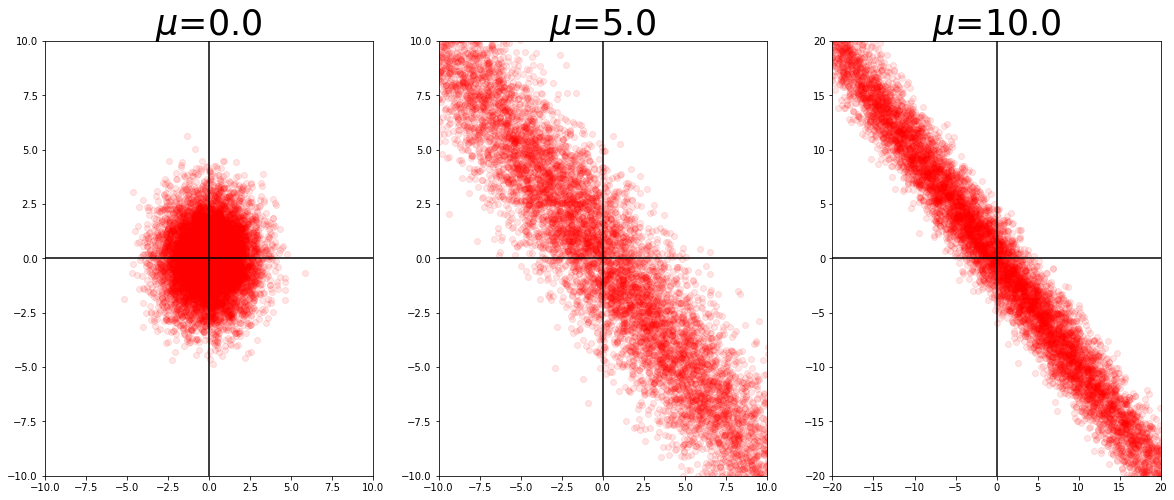

In [3]:
fig,AX=plt.subplots(nrows=1,ncols=3,figsize=(20,8))
for mu,ax in zip(np.linspace(0,10,3),AX):
    XX,YY=[],[]
    for _ in range(10000):
        x,y=fitness(generator(),mu=mu)
        XX.append(x)
        YY.append(y)
    ax.plot(XX,YY,'or',alpha=0.1)   
    xylim=max(2*mu,10)
    ax.plot([0,0],[-xylim,xylim],'-k')
    ax.plot([-xylim,xylim],[0,0],'-k')
    ax.set_xlim([-xylim,xylim])
    ax.set_ylim([-xylim,xylim])
    ax.set_title(r'$\mu$={}'.format(mu),fontsize=35)

illustrate for N=20 for a GIVEN network

In [4]:
def network(LL):
    """define the graph for a given fitness LL"""
    if LL is list :
        LL=np.array(LL)
    LL=LL-np.diag(np.diag(LL)) # be sure that the self fitness is zero
    G=nx.DiGraph()
    n=len(LL)
    nodes=['{}'.format(i+1) for i in range(n)]
    G.add_nodes_from(nodes)
    pair=[(i,j) for j in range(n) for i in range(j) 
           if LL[i,j] !=0 or LL[j,i] !=0  ]
    edges=[('{}'.format(x[0]+1),'{}'.format(x[1]+1)) for x in pair]
    G.add_edges_from(edges)
    for (i,j),(a,b) in zip(pair,G.edges):
        classe='degenerate'
        if LL[i,j]<0 and LL[j,i]<0: G[a][b]['type']='bist'
        elif LL[i,j]>0 and LL[j,i]>0: G[a][b]['type']='coex'
        elif LL[i,j]<0 and not LL[j,i]<0: G[a][b]['type']='excl_'+b
        elif not LL[i,j]<0 and LL[j,i]<0: G[a][b]['type']='excl_'+a
        #print(classe)
    return G
def net_draw(G,**kwargs):
    """plot the graph G
    kwargs as the following entry :
    - nodes : z, the size of the nodes. Default is 100
    -ax= plot on the curent ax. default is None"""
    zz=np.array(kwargs.pop('nodes',[1/G.number_of_nodes()]*G.number_of_nodes()))
    ax=kwargs.pop('ax',None)
    if ax is None : fig,ax=plt.subplots()
    pos=nx.layout.circular_layout(G)
    nx.draw_networkx(G,pos=pos,
            node_size=1000*zz+0.01,node_color='grey',alpha=1,
           edgelist=[], ax=ax)
    edgecoex,edgebist,edgeexclui,edgeexcluj=[],[],[],[]
    edgecoex_size,edgebist_size,edgeexclui_size,edgeexcluj_size=[],[],[],[]
    for i,j in G.edges :
        
        if G[i][j]['type']=='coex':
            edgecoex.append((i,j))
            edgecoex_size.append(20*zz[eval(i)-1]*zz[eval(j)-1])
        elif G[i][j]['type']=='bist':
            edgebist.append((i,j))
            edgebist_size.append(20*zz[eval(i)-1]*zz[eval(j)-1])
        elif G[i][j]['type']=='excl_'+i:
            edgeexclui.append((i,j))
            edgeexclui_size.append(20*zz[eval(i)-1]*zz[eval(j)-1])
        elif G[i][j]['type']=='excl_'+j:
            edgeexcluj.append((j,i))
            edgeexcluj_size.append(20*zz[eval(i)-1]*zz[eval(j)-1])
    nx.draw_networkx_edges(G,pos=pos,
                           edgelist=edgecoex,
                           edge_color='red',
                           width=edgecoex_size,
                           arrows=True,
                           arrowsize=0.001,
                           alpha=1,
                           node_size=1000,
                           connectionstyle='Arc3, rad=0.1',
                          ax=ax)
    nx.draw_networkx_edges(G,pos=pos,
                           edgelist=edgebist,
                           width=edgebist_size,
                           edge_color='blue',
                           arrows=True,
                           arrowsize=0.001,
                           alpha=1,
                           node_size=1000,
                           connectionstyle='Arc3, rad=0.1',
                          ax=ax)
   
    for edg,edg_size in zip(edgeexclui+edgeexcluj,edgeexclui_size+edgeexcluj_size):
        nx.draw_networkx_edges(G,pos=pos,
                               width=[edg_size],
                               edgelist=[edg],
                               edge_color='grey',
                               style='dotted',
                               arrowsize=10*edg_size,
                               arrowstyle='-|>',
                               alpha=0.8,
                               node_size=1000,
                               connectionstyle="angle3,angleA=-45,angleB=45",
                               ax=ax)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.set_xticks([])
        ax.set_yticks([])

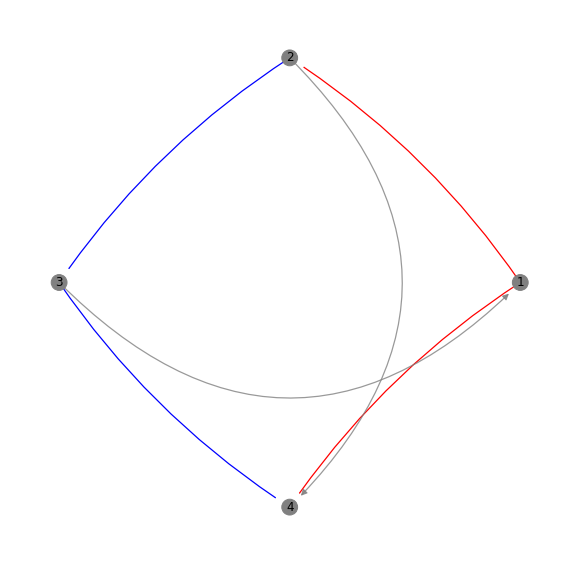

In [5]:
fig,ax=plt.subplots(figsize=(10,10))
n=4
LL=2*np.random.random((n,n))-1
#LL=[[0,-1,1],[1,0,-1],[-1,1,0]]
G=network(LL)
net_draw(G,ax=ax)


In [6]:
#Parametres of  the neutral
N,m,kmean,R0= 3,6.,0.5,2.
beta=m*R0
#elements clefs du neutral model
Ss,Ts,Is=1/R0,1-1/R0,(R0-1)/(R0+R0*kmean*(R0-1))
Ds=Ts-Is
N=3;
A0=np.random.random((N,N))
A0[0,0]=-0.;A0[0,1]=-0.5;A0[0,2]=+0.5
A0[1,0]=-0.5;A0[1,1]=+0.1;A0[1,2]=+0.5
A0[2,0]=+0.6;A0[2,1]=-0.5;A0[2,2]=+0.

def fitness(A,mu=1):
    """Computation of the fitness of the reducted model.
    A is the matrix of interaction and mu is the ratio I/II
    """
    n=len(A)
    return np.array(mu*(A.T-A)+A.T-np.matrix(np.ones((n,1)))*np.matrix(np.diagonal(A)))
def theta(R0,k,beta=1):
    T=1-1/R0
    I=(R0-1)/(R0+R0*k*(R0-1))
    D=T-I
    return beta*I*D*T/(2*T**2-I*D) 
def thetamu(R0,k,beta=1):
    return theta(R0,k,beta=beta)/(R0-1)*k
def slowdyn(T,z,Lambda=None,D=1):
    n=len(z)
    if type(z) is list:
        z=np.array(z)
    if Lambda is None : Lambda=np.array([[]])
    if type(Lambda) is list : Lambda=np.array(Lambda)
    if np.shape(Lambda)!=(len(z),len(z)):
        print('Attention mauvais lambda. Remplacement par une valeur par défaut')
        Lambda=np.ones((len(z),len(z)))
    Lambda=Lambda-np.diag(np.diag(Lambda))
    Q=np.dot(z.T,np.dot(Lambda,z))
    L=np.dot(Lambda,z)

    return D*np.array([max(zi,10**-17) for zi in z])*(L-Q)

In [7]:
def traject(T,X0,fit,D=1):
    """kwargs=[A,mu] or kwargs=[Lambda]"""

    if type(X0) is list: X0=np.array(X0)
    if (X0<0).any() : 
        print('negativ entry')
        return None
    if (X0==0).all() : 
        print('no positiv entry')
        return  None
    X0=X0/np.sum(X0)
    def f_eval(t,X):
        Z=slowdyn(t,X,Lambda=fit,D=D)[:-1]
        return np.concatenate((Z,np.array([-sum(Z)])))
    resultat = ode.solve_ivp(fun=f_eval, 
                             t_span=(0, T), 
                             y0=X0,
                             dense_output=True
                             #t_eval=np.arange(0,T,0.1),
                            )
    return resultat
def simu(T=100,mu=None,A=None,fit=None,n=3,z0=None,T_threshold=None,V_threshold=10**-4,**kwargs):
    """Compute the dynamics for a n strain system.
    Input are :
    -T the final time 
    -mu the ratio I/D=1/(k(R0-1))
    -A the array of rescalled interactions.  A is automatiquely renormalised such that the euclidan norm is ||A||=1
    -fit the matrix of fitness (usefull if neither mu nor A is given).
    -n the number of species (usefull is neither mu nor A nor fit is given)
    If mu and A are given, the fitness is computed by the function fitness.
    If mu is given and not A, then A is generated randomly using a uniform distribution between -1 and 1
    If A is given and not mu then mu is generated randomly using a uniform distribution between 0 and 10
    If none of mu, A or fit are  given, then mu=1 and A  is generated by using a uniform distribution between -1 and 1.
    
    Additional arguments are 
    -z0 : the initial data
    -V_threshold : If z_i < threshold, then the strain i is considered to be not here
    -T_threshold: a percentage of T from which we compute the threshold. Default is 100%
    The output are mu, A, fit, the resultat of the dynamics and the number of coexistent species
    """
    if mu is not None and A is  None :
        A=2*np.random.random((n,n))-1
    if  A is not None :
        if A is list:   A=np.array(A) ## Transform A in Array
        A=A/sum(sum(A**2)) ## renormalisation of A
        if mu is None : mu=10*np.random.random(1) ##generation of mu if needed
        n=len(A)
        fit=fitness(A=A,mu=mu)
    if mu is None and A is None and fit is None :
        mu=1
        A=2*np.random.random((n,n))-1
        A=A/sum(sum(A**2))
        fit=fitness(A=A,mu=mu)
    n=len(fit)
    if z0 is not None and len(z0)!=n : 
        print('Mistake in z0, the size len(z0)={}'.format(len(z0)),
                                                          r'$\ned$',
                                                          'n={}'.format(n),
                                                          'a random z0 is taken.') 
        z0=np.random.random(n)
    if z0 is None : z0=np.random.random(n)  ##Generation of the initial data
    ##Computation of the dynamics
    D=kwargs.pop('D',1)
    resultat=traject(T=T,X0=z0,fit=fit,D=D)
    if T_threshold is None : nc=len(resultat.y[:,-1][resultat.y[:,-1]>V_threshold])
    
    else :  
            Tstart=T*T_threshold
            ind_threshold=np.int(np.min(np.arange(0,len(resultat.t),1)[resultat.t>Tstart].tolist()+[T]))
            mean=np.mean(resultat.y[:,ind_threshold:],axis=1)
            nc=len(mean[mean>V_threshold])
    return mu, A,fit,resultat,nc


def essai(resultat=None,details=1000,ax=None,isplot=True,**kwargs):
    """Plot the dynamics from simu"""
    if resultat is None :
        mu, A,fit,resultat,nc=simu(**kwargs)
        kwargs['mu']=mu
        kwargs['A']=A
        kwargs['fit']=fit
        kwargs['nc']=nc
    D=kwargs.pop('D',1)
    z0=kwargs.pop('z0',None)        
    mu=kwargs.pop('mu',None)
    n=kwargs.pop('n',3)
    A=kwargs.pop('A',None)
    fit=kwargs.pop('fit',None)
    nc=kwargs.pop('nc',None)
    T=kwargs.pop('T',resultat.t[-1])
    V_threshold=kwargs.pop('V_threshold',10**-4)
    T_threshold=kwargs.pop('T_threshold',1)
    n=len(resultat.y)
    if ax is None : 
        fig,ax=plt.subplots() 
        
    y=resultat.sol(np.linspace(0,T,details))
    for i in range(np.shape(resultat.y)[0]):
        ax.plot(np.linspace(0,T,details),y[i],**kwargs,visible=isplot)
    titre='N={} strains and '.format(n) 
    coexist=(nc>1)*'{} strains coexist'.format(nc)+(nc==1)*'1 strain survives '
    mean= '\n(mean> {:0.0e} on the last {:0.0f}% of time) '.format(V_threshold, (1-T_threshold)*100)
    ax.set_title(titre+coexist+mean) 
    ax.set_xlabel('Slow time scale '+r'$\tau$',fontsize=30)
    ax.set_ylabel('Strain frequency $z_i$', fontsize=30)
    ax.yaxis.set_ticks_position('left')
    
    RETURN={}
    RETURN['mu']=mu
    RETURN['A']= A
    RETURN['fit']=fit
    RETURN['res']=resultat
    RETURN['nc']=nc
    return RETURN

In [8]:
def picture(Tm=100,ax1=None,ax2=None,num=None,**kwargs):
    if ax1 is None and ax2 is None : fig,(ax1,ax2)=plt.subplots(num=num,nrows=1, ncols=2)
    elif ax1 is None and ax2 is not None : fig,ax1=plt.subplots()
    elif ax2 is None and ax1 is not None : fig,ax2=plt.subplots()
    
    Galpha=kwargs.pop('Galpha',1.)
    dic=essai(ax=ax2,T=Tm,**kwargs)
    N=len(dic['fit'])
    zco=[cu.get_color() for cu in ax2.get_children()[0:N]]
    Fit,res=dic['fit'],dic['res']
    G=network(Fit)
    pos=nx.drawing.circular_layout(G)
    times,=ax2.plot([0,0],[0,1],'--k')
    z=res.sol([0])
    dyna=sum([pos[x]*zt for x,zt in zip(pos,z[:,0])])
    net_draw(G,nodes=z[:,0],ax=ax1,zcolor=zco,Galpha=Galpha)
    actual,=ax1.plot(*dyna,'.k')
    trajectory,=ax1.plot([],[],'-k',alpha=0.3)
    title=ax1.set_title(r'$\tau=${:0.0f}'.format(0))
    ax1.text(-0.05,1.05,
             'A', fontsize='xx-large',
             transform=ax1.transAxes)
    ax2.text(-0.05,1.05,
             'B', fontsize='xx-large',
             transform=ax2.transAxes)
    dico=dict()
    dico['times']=times
    dico['axes']=ax1,ax2
    dico['colors']=zco
    dico['results']=dic
    dico['Galpha']=Galpha
    return dico
def movie(step=1,frame=1,choice=None,**dico):
    ax1,ax2=dico['axes']
    zco=dico['colors']
    dic=dico['results']
    Fit=dic['fit']
    res=dic['res']
    times=dico['times']
    Tm=res.t[-1]
    TT=np.arange(0,Tm+step,step)
    z=res.sol(TT)
    n=len(TT)
    G=network(Fit)
    pos=nx.drawing.circular_layout(G)
    dyna_hist_XX,dyna_hist_YY=[],[]
    choice_bool=True
    if choice is not None :
        if choice=='f': choice_bool=False
    for tk in range(n):
        
        dyna=sum([pos[x]*zt for x,zt in zip(pos,z[:,tk])])
        dyna_hist_XX+=[dyna[0]]
        dyna_hist_YY+=[dyna[1]]
        if tk%frame==0 and (choice_bool or tk==n-1):
            ax1.clear()
            ax1.text(-0.05,1.05,
             'A', fontsize='xx-large',
             transform=ax1.transAxes)

            #print(dyna_hist_XX)
            times.set_data([TT[tk],TT[tk]],[0,1])
            net_draw(G,nodes=z[:,tk],ax=ax1,zcolor=zco,Galpha=dico['Galpha'])
            ax1.plot(*dyna,'.k',lw=2)
            titletau=r'$\tau=${:0.0f}'.format(TT[tk])
            ax1.set_title(titletau)
            ax1.plot(dyna_hist_XX,dyna_hist_YY,'-k',color='black',lw=1,alpha=0.7)
            plt.pause(0.001)
            if tk==0:
                if choice is None :
                    u=input('Press v for a video,  f for the immediat full dynamics otherwise stop.\n')
                    if u=='f':frame=n-1
                    elif u!='v':return None
                elif choice!='v' : return None
            
def allin(**kwargs):
    step=kwargs.pop('step',1)
    frame=kwargs.pop('frame',1)
    choice=kwargs.pop('choice',None)
    dico=picture(**kwargs)
    movie(step=step,frame=frame,choice=choice,**dico)
    return dico['results']
  

In [9]:
print(plt.style.available)
mpl.style.use('fivethirtyeight')

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


In [30]:
A=np.array([[ 0.01486346, -0.06256634,  0.01838864,  0.06685221,  0.03218123,
        -0.0476415 ],
       [-0.03824892,  0.01248923,  0.06683666, -0.04593062,  0.021539  ,
        -0.09572773],
       [-0.06415632,  0.00020272, -0.09121406, -0.07369854, -0.01919245,
        -0.0287018 ],
       [-0.09161804, -0.07695071, -0.04866895,  0.0224391 ,  0.02087932,
         0.06571929],
       [-0.00304582,  0.03312631, -0.10128894,  0.07541385, -0.07194801,
        -0.02619226],
       [ 0.01412218,  0.05036979,  0.04227411,  0.02310919, -0.04236523,
        -0.06660448]])
mu=1

[0.8860594978899531, 1.0034645754577667, 0.6133069160777835, 0.014271501741830303, 2.155751919989635, 0.0605202214161375, 0.13001613281317798, 0.020618387525077213]


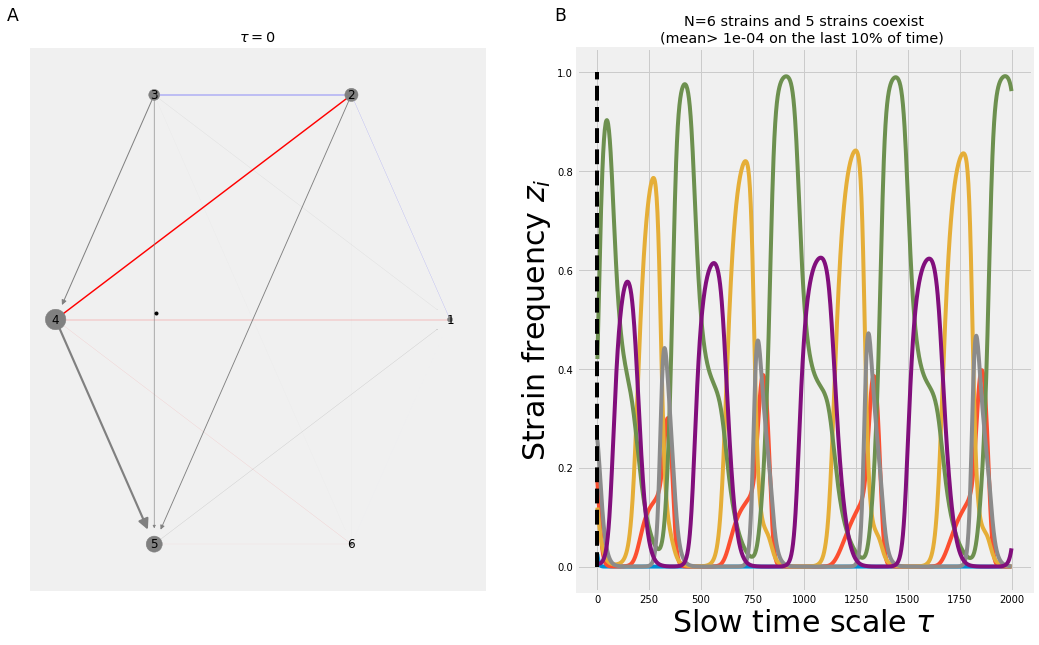

In [37]:
plt.rc("figure",figsize=(16,10))
fit=fitness(A,mu)
dico=picture(T_threshold=0.9,fit=fit,Tm=2000,D=1)
ax1,ax2=dico['axes']
zco=dico['colors']
dic=dico['results']
Fit=dic['fit']
res=dic['res']
times=dico['times']
Tm=res.t[-1]
step=0.1
TT=np.arange(0,Tm+step,step)
z=res.sol(TT)
n=len(TT)
G=network(Fit)
pos=nx.drawing.circular_layout(G)

In [32]:
def frame(k) : 
    dyna_hist_XX,dyna_hist_YY=[],[]
    for tk in range(k+1):
        dyna=sum([pos[x]*zt for x,zt in zip(pos,z[:,tk])])
        dyna_hist_XX+=[dyna[0]]
        dyna_hist_YY+=[dyna[1]]
    
    ax1.clear()
    ax1.text(-0.05,1.05,
     'A', fontsize='xx-large',
     transform=ax1.transAxes)

    #print(dyna_hist_XX)
    times.set_data([TT[tk],TT[tk]],[0,1])
    net_draw(G,nodes=z[:,tk],ax=ax1,zcolor=zco,Galpha=dico['Galpha'])
    ax1.plot(*dyna,'.k')
    titletau=r'$\tau=${:0.0f}'.format(TT[tk])
    ax1.set_title(titletau)
    ax1.plot(dyna_hist_XX,dyna_hist_YY,'-k',color='black',lw=3,alpha=1)
    return ax1,ax2



[4.163601207130448e-06, 0.05768623008326566, 0.00013477076182739366, 0.04777854277635328, 0.01379135299455177, -1.019766973287602e-09, -2.4380109916170127e-10, 0.0014760679221605718]


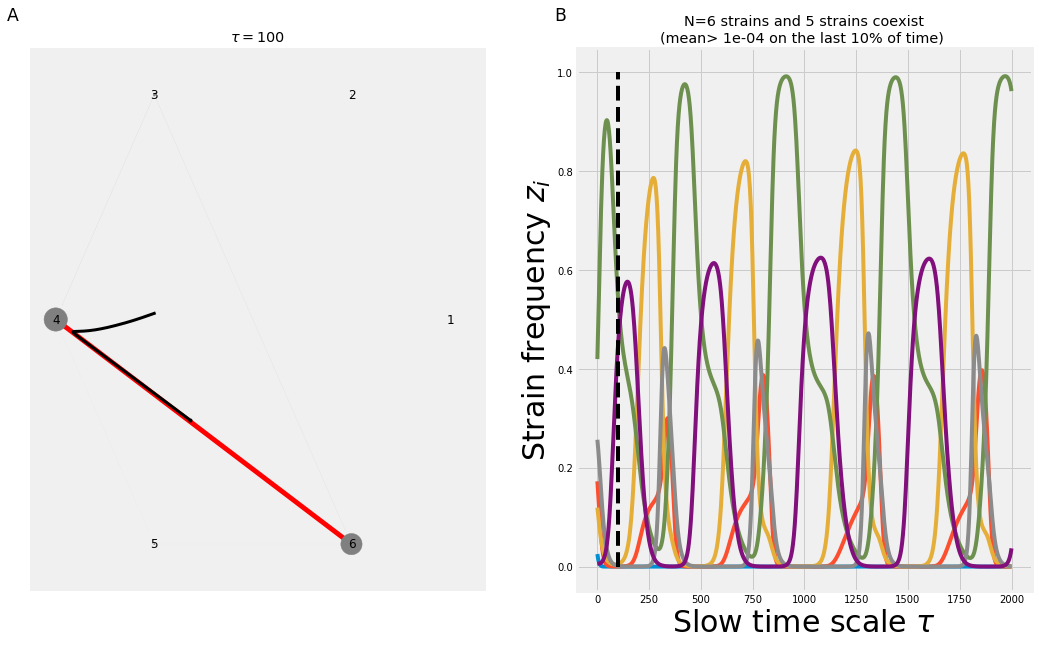

In [41]:
frame(1000)
fig=ax1.get_figure()
fig

In [43]:
import matplotlib.animation as animation

In [44]:
ani2 = animation.FuncAnimation(fig=fig, func=frame, interval=50,frames=[5*k for k in range(int((TT.size-1)/5))],blit=False)

In [45]:
# Création du fichier, dpi : résolution, fps : images par secondes

ani2.save(filename="vid2_supple.mp4", dpi =80, fps=20)

D:\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


[0.8860594978899531, 1.0034645754577667, 0.6133069160777835, 0.014271501741830303, 2.155751919989635, 0.0605202214161375, 0.13001613281317798, 0.020618387525077213]
[0.8860594978899531, 1.0034645754577667, 0.6133069160777835, 0.014271501741830303, 2.155751919989635, 0.0605202214161375, 0.13001613281317798, 0.020618387525077213]
[0.8641885698785671, 1.0062178911090847, 0.5979705591884994, 0.013979758858604174, 2.1828575863402975, 0.05577625414503385, 0.1209992592796508, 0.020203582985188418]
[0.8420206297284322, 1.0083987617580068, 0.5826126601196734, 0.013701282989195564, 2.2087993471594203, 0.051333726175020494, 0.11244153123013828, 0.019801771777977085]
[0.8195962484961298, 1.0100052623754256, 0.567256376509141, 0.01343555656642085, 2.23352415744045, 0.0471800672378345, 0.10433393156539661, 0.019412266153906555]
[0.7969569396715274, 1.011036342280794, 0.5519241672568527, 0.013182326869108103, 2.2569806905237453, 0.04330241846394597, 0.09666588453747368, 0.019034765104723184]
[0.77414

[0.07578560586416727, 0.6191572053472463, 0.08696769988192675, 0.008286265334174921, 1.8154363316560422, 0.0002823399069301411, 0.0008278513445222613, 0.007220837616198665]
[0.07043164253969862, 0.6067423373943408, 0.08265212892244395, 0.008307772572232012, 1.7828450754302134, 0.00024498674418656387, 0.0007198663806689729, 0.007079431295201243]
[0.0654150751929708, 0.594434900403972, 0.07853433467212921, 0.008332323680606516, 1.7501035528753697, 0.0002122406868458324, 0.0006248677186705743, 0.006940398519636035]
[0.06071923668030068, 0.5822455236467072, 0.0746071898637886, 0.008359724337286479, 1.7172624760961785, 0.0001836815363206517, 0.0005417463888765723, 0.006803581284116087]
[0.05632769127724036, 0.5701840077644844, 0.07086362127990432, 0.008389731035989108, 1.6843703390465898, 0.0001589975580240844, 0.00046969183118027164, 0.0066687839424357815]
[0.05222432390644087, 0.5582593227926449, 0.06729663916267571, 0.008422411830116784, 1.6514733761227922, 0.0001376400540587709, 0.00040

[0.0015306123109189954, 0.20821796457895675, 0.007059685656958845, 0.012356582507580132, 0.5515278269873946, 9.493764073647147e-07, 2.5147086035816446e-06, 0.0026790339153904786]
[0.0014076816818929731, 0.20348390031841812, 0.006705736517157486, 0.012506276735677405, 0.5353439503649492, 8.824310627913005e-07, 2.3215798907933366e-06, 0.002625342738184396]
[0.0012948082966814803, 0.19886712659382955, 0.006370143577549006, 0.012658407948159145, 0.5195463638612734, 8.505510165227533e-07, 2.2220901738850674e-06, 0.0025729736597807735]
[0.0011911639280166838, 0.19436506793811914, 0.006051941053909109, 0.012812955296499126, 0.5041287465076233, 8.428674780378997e-07, 2.1861630265299e-06, 0.0025218900885727777]
[0.0010959834862977176, 0.18997520020206446, 0.005750214089709999, 0.012969900896753362, 0.48908472248224705, 8.470045680111086e-07, 2.180584590232251e-06, 0.0024720466020903475]
[0.0010085609323928564, 0.18569505428514735, 0.005464096211911855, 0.01312923067806801, 0.4744078726213872, 8

[4.258470935415316e-05, 0.07921955286427053, 0.0007424859886941889, 0.02171754292786004, 0.11255787702008929, -1.6121298043157446e-09, -2.2905697103023288e-09, 0.0012455928698341815]
[4.0451637106768325e-05, 0.07795955540197784, 0.000711863768016006, 0.021969648660203126, 0.10841499105705689, -1.9102811199812823e-09, -2.656545557133605e-09, 0.0012484246212482518]
[3.848125771259986e-05, 0.07674218900084577, 0.0006827481714816356, 0.022224983804681294, 0.10441493944725247, -2.028452805553528e-09, -2.7599001230098713e-09, 0.0012526512192487112]
[3.664590328355172e-05, 0.07556659615450098, 0.0006550597641317174, 0.022483695432194122, 0.1005534719805017, -2.0038167204222195e-09, -2.666399423881355e-09, 0.001257801766159683]
[3.491927731426589e-05, 0.0744319467427375, 0.0006287229471636681, 0.022745935238989, 0.09682636114052004, -1.8732771977663322e-09, -2.4368919852942342e-09, 0.0012633094178695953]
[3.327647184914572e-05, 0.07333743865327856, 0.0006036657604740428, 0.02301185919751261, 0

[5.366933846677072e-06, 0.05557551337064919, 0.00016470062930147046, 0.040137606608910185, 0.019716987051852607, -9.25421434154529e-10, -3.2831945812250756e-10, 0.0013079238394388222]
[5.216339115850488e-06, 0.055682577827555584, 0.00016114324831920945, 0.04081038658471305, 0.019017547464954137, -9.329512005322845e-10, -3.186354588962381e-10, 0.0013210656859362923]
[5.073676565915135e-06, 0.055812572124166994, 0.000157731209351804, 0.04150179550330175, 0.018344943181980412, -9.408862217907614e-10, -3.0925835564539215e-10, 0.0013349716150267755]
[4.938436295561928e-06, 0.05596552484866303, 0.00015445623472563422, 0.0422124273460657, 0.017697898002105805, -9.492325615525604e-10, -3.0017445740145075e-10, 0.0013496598806767637]
[4.810143265535385e-06, 0.056141488080355614, 0.00015131052029901385, 0.04294289243829165, 0.017075206026034136, -9.579966823498579e-10, -2.9137080762746654e-10, 0.0013651493924973649]
[4.6883552942472325e-06, 0.056340536849148595, 0.00014828672318268712, 0.04369381

[2.7090537817805214e-06, 0.0880735545105069, 8.798687179290036e-05, 0.1028326749682029, 0.004164604136597504, -1.8527434977228837e-09, -8.760794630754185e-11, 0.00316614560032234]
[2.7058007079485754e-06, 0.08958594499192342, 8.760781171149903e-05, 0.10532534909497986, 0.004044673675653533, -1.891995380535396e-09, -8.542080915482348e-11, 0.0032530136134963045]
[2.7043798913396982e-06, 0.0911457198723791, 8.727674037260712e-05, 0.10789145041005103, 0.003929699211904631, -1.932449723790666e-09, -8.331654154751791e-11, 0.0033431526852484837]
[2.704797217870613e-06, 0.09275412698346797, 8.699350051054445e-05, 0.11053321797733219, 0.0038194781688647515, -1.9741423646587347e-09, -8.129227139822038e-11, 0.0034366928415662055]
[2.7070520748805025e-06, 0.0944124501960617, 8.67576902615518e-05, 0.11325295377143378, 0.00371380338499035, -2.017110226589403e-09, -7.934494626344165e-11, 0.0035337690822455255]
[2.7111361377061124e-06, 0.09612200876336102, 8.656863170737241e-05, 0.11605302257730145, 0

[9.171674886531465e-06, 0.6729500643948886, 0.00015591941867114536, 1.0798716423141548, 0.000548833010284404, -1.8779839311652814e-08, -1.5316137537396288e-11, 0.0635214760733527]
[9.347580678253386e-06, 0.6879430656608216, 0.0001574366522200419, 1.1050896769687772, 0.0005380722940589988, -1.926989365847467e-08, -1.5071880806195198e-11, 0.06561315148986385]
[9.528884991582168e-06, 0.7031744112981674, 0.0001589950734547377, 1.1306907768078445, 0.000527624215514106, -1.9771128766260315e-08, -1.4835190441398338e-11, 0.06776450451662473]
[9.715750074140775e-06, 0.7186406936783793, 0.00016059594036781528, 1.1566668605803347, 0.0005174815473848625, -2.028365483645606e-08, -1.4605931982036215e-11, 0.06997615326203929]
[9.908337934847962e-06, 0.7343379511776398, 0.00016224051246997462, 1.1830087918990748, 0.0005076371733743864, -2.080757143261333e-08, -1.4383972297629892e-11, 0.0722486061685829]
[1.0106811260405917e-05, 0.7502616759913797, 0.00016393005504349915, 1.2097063880472887, 0.00049808

[2.61198175698013e-05, 1.4837726359492096, 0.00029073860700165735, 2.3687523676792943, 0.00028490648656209446, -5.2851135773204247e-08, -1.0148206699018323e-11, 0.2128075811805254]
[2.6822047637588154e-05, 1.4999451183902328, 0.0002960530578985898, 2.390894241330526, 0.0002828934735676558, -5.381228800052267e-08, -1.0149134715961266e-11, 0.2166121157220718]
[2.7548120568164462e-05, 1.5158404385135835, 0.0003015360789336225, 2.412347662244735, 0.00028100065676694503, -5.477888401933134e-08, -1.01546983411305e-11, 0.2203903575547807]
[2.8298741298183966e-05, 1.531445987653292, 0.00030719154062597395, 2.433088744561785, 0.00027922468194273287, -5.575053349830917e-08, -1.0164854072363986e-11, 0.22413816733876363]
[2.907466568420291e-05, 1.5467497881537067, 0.000313023747086095, 2.453094904929055, 0.00027756258274360285, -5.672685122091541e-08, -1.0179572324095068e-11, 0.22785144870435955]
[2.9876704329098825e-05, 1.5617404892520719, 0.0003190374624535942, 2.47234486587595, 0.00027601176967

[0.00010855614704939452, 1.8423457566002872, 0.0008782850979132916, 2.5171109691483227, 0.000313312514782275, -9.760788840197223e-08, -1.6599366795428592e-11, 0.3111152280230144]
[0.00011263674265043813, 1.8410093114757067, 0.0009065598880451375, 2.5014614604943075, 0.00031738160817683744, -9.849310448646866e-08, -1.6979761971539168e-11, 0.31079741613458395]
[0.00011689903180590708, 1.8393380071726284, 0.0009360496124194588, 2.485229195505841, 0.0003216481944395706, -9.937110291936553e-08, -1.737719533269171e-11, 0.31036911176051973]
[0.00012135081234050375, 1.8373383285878397, 0.0009668048599452776, 2.4684369681394753, 0.0003261157623186824, -1.0024172864923877e-07, -1.7792263540114862e-11, 0.30983173927364227]
[0.00012600009075100052, 1.8350168885670866, 0.000998877604361124, 2.4511080427270335, 0.00033078777085567386, -1.0110483173944472e-07, -1.822557717163278e-11, 0.30918686581390076]
[0.00013085507784543646, 1.8323804157520898, 0.001032321203599811, 2.433266126303375, 0.000335667

[0.0007342748521691339, 1.5372572755639484, 0.005037804219078014, 1.4919811983513507, 0.0008441537105560585, -1.3009290686738752e-07, -7.143788602909141e-11, 0.21746066862023888]
[0.0007694190521183057, 1.527300656636239, 0.0052671163749521115, 1.4686551423716423, 0.0008698990879195938, -1.3061250291014103e-07, -7.439248890435595e-11, 0.21454077849998868]
[0.0008064735565588264, 1.5172850425276079, 0.005508656081021022, 1.4454804059817719, 0.0008967781203623537, -1.311246612764199e-07, -7.750008994798256e-11, 0.21161998621851652]
[0.00084554128549827, 1.5072144139427652, 0.005763066761755425, 1.4224637475279547, 0.0009248334363180412, -1.3162944395384358e-07, -8.076840948861103e-11, 0.20869996399158772]
[0.0008867289498956861, 1.497092643750921, 0.006031013945576795, 1.3996114190461786, 0.0009541075735177967, -1.321269154462874e-07, -8.420540386665752e-11, 0.20578230709996057]
[0.0009301470835062476, 1.4869234962840407, 0.006313185351012574, 1.3769291634350083, 0.000984642908672316, -1

[0.007636142896369632, 1.053319011872466, 0.04853945671000855, 0.6148791547802265, 0.004340693032004217, -1.474070802663736e-07, -6.074597334409509e-10, 0.09673171906212634]
[0.00804847293912631, 1.0434740998202796, 0.05109173177423307, 0.601736793815036, 0.004512656689364775, -1.4762858781868928e-07, -6.384414663250618e-10, 0.09479150800559538]
[0.008484580268905435, 1.0336726559160236, 0.05378748361085497, 0.5888193375890772, 0.004692434586809229, -1.4784392298523706e-07, -6.711485823823969e-10, 0.09288192341926224]
[0.008945802754852728, 1.0239157023427126, 0.05663446253041725, 0.576124063426262, 0.00488035275211849, -1.4805304722870794e-07, -7.056743976569176e-10, 0.0910027570398068]
[0.009433529900496014, 1.0142042370778535, 0.05964067802289962, 0.563648074534516, 0.005076739019041201, -1.4825591907327745e-07, -7.421154257171044e-10, 0.08915376452354842]
[0.00994920333150567, 1.0045392350682372, 0.06281439661398196, 0.5513883024159753, 0.0052819225393017305, -1.4845249410460574e-0

[0.09333252442980007, 0.6500162799070943, 0.536101696588119, 0.1961180243330338, 0.028945841102524673, -1.4902635722897188e-07, -6.636284951285292e-09, 0.03414313070389312]
[0.09840940289591842, 0.6429706535465611, 0.5628742273638958, 0.19083633905750258, 0.03017237697592801, -1.487534201665849e-07, -6.980480749732682e-09, 0.03336462972455588]
[0.10374768493939937, 0.6359988686869676, 0.5907966014616018, 0.18566869101876043, 0.03144982786670356, -1.4845967117563198e-07, -7.341256932202325e-09, 0.03260461690414278]
[0.10935877065880092, 0.6291015799372358, 0.61989577467443, 0.18061220400590738, 0.03278005931987347, -1.4814442865290244e-07, -7.719235357246115e-09, 0.031862660471328616]
[0.11525445064807958, 0.6222794096566143, 0.6501974635209699, 0.1756639611043255, 0.0341650178004852, -1.4780699590266292e-07, -8.115050197205325e-09, 0.031138314853010326]
[0.12144692173051339, 0.6155329402232297, 0.6817259779638457, 0.17082100691655636, 0.03560673788148912, -1.4744666113665775e-07, -8.52

[0.8694812365638274, 0.40560542186281745, 2.7668834167214595, 0.0388369341754061, 0.19926145395107633, -1.019309622912415e-07, -5.007554301296941e-08, 0.012204339852957189]
[0.9011893671774506, 0.4029461484938927, 2.796521658159873, 0.03722699925340117, 0.2070396808532691, -1.0020197206717901e-07, -5.148525279419903e-08, 0.011996537127183625]
[0.9334381435128871, 0.4004330360068481, 2.8229263275586067, 0.03566877079973067, 0.215089021779127, -9.846368052206805e-08, -5.288888483192459e-08, 0.011794353565536346]
[0.9661906237610196, 0.3980715629691537, 2.8460017127078174, 0.0341611857198922, 0.2234152740111996, -9.671908757165017e-08, -5.428300703209956e-08, 0.011597398972650315]
[0.9994078285916039, 0.3958667533469313, 2.865674134283606, 0.03270320804740915, 0.23202392469603159, -9.497121582125268e-08, -5.566416993015134e-08, 0.011405289160978287]
[1.0331231364983768, 0.39379089952920104, 2.8819956403518066, 0.03129459024289126, 0.24092960360957968, -9.32190945161219e-08, -5.70334142243

[2.372125999610802, 0.39683893193005715, 1.5705114618532825, 0.003632130622712572, 0.974132593913358, -3.43549341133514e-08, -8.433210148710898e-08, 0.005486029037923673]
[2.3849944247229495, 0.39849613691008234, 1.5307866487454136, 0.003445676861852401, 0.9985659493064132, -3.357001076697916e-08, -8.41209401167144e-08, 0.005368429435708761]
[2.396515254738608, 0.4001920857472591, 1.4917997775534662, 0.0032692192882556453, 1.0231924931207, -3.280811741287631e-08, -8.388226715577288e-08, 0.005251866914901421]
[2.4066788705076507, 0.40192533141425774, 1.4535683326438835, 0.0031022802692084227, 1.047998163107485, -3.20686458282395e-08, -8.361722761559515e-08, 0.005136457782288433]
[2.4154775456775543, 0.4036947300335692, 1.4161067257161886, 0.002944397543337831, 1.0729688633644388, -3.1351002981549013e-08, -8.332694863678444e-08, 0.005022309422253301]
[2.4229054446130966, 0.40549943072254974, 1.3794265389149118, 0.0027951240760652305, 1.0980905114064268, -3.065461103256881e-08, -8.3012539

[1.636954201329478, 0.5163126695896374, 0.4480077248901323, 0.0004301044321796611, 2.163287510544991, -1.4044700678304794e-08, -5.8845593680409896e-08, 0.001571538208274393]
[1.601735410427334, 0.5187722943603915, 0.43614213207208036, 0.0004169891212799066, 2.184343030285043, -1.3823322956996537e-08, -5.820449450509439e-08, 0.0015313958276487285]
[1.5662215304077047, 0.5211393789127018, 0.42451061819424224, 0.00040456875389322433, 2.2049733695841103, -1.360473281757501e-08, -5.756247709710111e-08, 0.001492646510405657]
[1.5304455293048274, 0.5234082478949778, 0.413107232750792, 0.00039280611133440724, 2.2251473869501477, -1.3388833974301684e-08, -5.691948694359239e-08, 0.0014552356127301557]
[1.4944402902430236, 0.5255738090741997, 0.40192667858041486, 0.0003816660807183028, 2.244832479458073, -1.3175550594489203e-08, -5.6275452464711495e-08, 0.0014191075109995725]
[1.4582386008511186, 0.5276316391251736, 0.39096428559350277, 0.00037111555728365833, 2.2639945593498156, -1.2964827298501

[0.22523222627582673, 0.4483285663578052, 0.08675212054140875, 0.0002132488863529915, 2.1605008400306365, -5.762772892256289e-09, -2.777087299114669e-08, 0.0005536524193803307]
[0.21065523769819355, 0.4419967561187275, 0.08281855332036489, 0.00021308932943445115, 2.1331581942626756, -5.6264219395146965e-09, -2.715415418440566e-08, 0.0005420087835792349]
[0.19682743086148138, 0.4355374514733205, 0.07902454764429549, 0.0002130194137560725, 2.1050026193906337, -5.492093352122119e-09, -2.6543919134961287e-08, 0.0005305701226149733]
[0.18373375565187244, 0.42896039102672306, 0.07536803181063663, 0.00021303607652766265, 2.076090552542959, -5.359811375679372e-09, -2.5940515705486236e-08, 0.0005193437786475817]
[0.171358105148248, 0.4222754463846297, 0.07184684735582246, 0.00021313633554400686, 2.046480683761082, -5.2295993368806185e-09, -2.5344296284249924e-08, 0.0005083401699754945]
[0.15968340455515156, 0.415492597799928, 0.06845875375279563, 0.00021331729084837035, 2.0162338502633452, -5.1

[0.005557102677781563, 0.17038267628117382, 0.007862913040924806, 0.00028324043307065706, 0.8148468603768656, -1.7415539279920188e-09, -8.328896935856475e-09, 0.00020017977572442166]
[0.005104106177407906, 0.1663335969130718, 0.007449679851364589, 0.0002819881247577289, 0.7937699705898213, -1.6970003547783074e-09, -8.098351425703061e-09, 0.00019320257490903494]
[0.004690746345825039, 0.16237810514527676, 0.007058383580573805, 0.00028048952492858007, 0.7731694638513447, -1.653672435092876e-09, -7.87402358761727e-09, 0.00018640318977875372]
[0.00431278618102771, 0.15851468507702557, 0.006687871350038484, 0.0002789793461196541, 0.7530401838523577, -1.6115363346682819e-09, -7.655767774157125e-09, 0.00017990451756074333]
[0.003966155088576835, 0.15474178967909788, 0.0063370480573563485, 0.0002777168589663598, 0.7333764794852062, -1.5705591265116932e-09, -7.443439328271449e-09, 0.00017381407295694504]
[0.003646951913946939, 0.1510578482107924, 0.006004873733449814, 0.0002769814226834585, 0.7

[9.74438654823445e-05, 0.0580607697956159, 0.0007224886189570249, 0.0005050306029001747, 0.23706583879244883, -5.713377044947645e-10, -2.3328084113695457e-09, 6.811475342617019e-05]
[8.893408449068674e-05, 0.05670740439818294, 0.0006858111454678903, 0.000513811530480251, 0.23043940320979397, -5.579743785040168e-10, -2.2674161188188917e-09, 6.662965215131396e-05]
[8.117997565642593e-05, 0.055386548893145766, 0.000651019893798784, 0.0005227615547100854, 0.22399005339772515, -5.449484103264897e-10, -2.203838765320536e-09, 6.518659520195354e-05]
[7.411577646024705e-05, 0.05409740211637997, 0.0006180166479883285, 0.0005318830988258566, 0.21771321067842997, -5.322508636860897e-10, -2.1420260472060567e-09, 6.37861924656521e-05]
[6.768058731164438e-05, 0.052839179282746236, 0.000586708271487566, 0.0005411788399765614, 0.2116043776889567, -5.198730295461267e-10, -2.0819287957847187e-09, 6.242847341726e-05]
[6.181806843028734e-05, 0.05161111239710283, 0.0005570064614510537, 0.0005506516472279922

[2.6129001047778905e-06, 0.02045064057672264, 7.174980918391336e-05, 0.001098132454573864, 0.06263981768818723, -2.0787825727866002e-10, -6.367260765462108e-10, 3.999049528147545e-05]
[2.4060693226774964e-06, 0.01999292043036234, 6.822545299416338e-05, 0.0011163552761537692, 0.060694523877868195, -2.0361372772200744e-10, -6.181307179273939e-10, 3.936988418959323e-05]
[2.2279405005922e-06, 0.019546237094538822, 6.487847291346139e-05, 0.0011347936075943351, 0.05880244905012015, -1.9945946983463312e-10, -6.000492706492324e-10, 3.896905282503919e-05]
[2.0756285154553144e-06, 0.019110347577502816, 6.16999021529959e-05, 0.0011534440275153322, 0.05696224417208562, -1.9541300441536864e-10, -5.824678607631899e-10, 3.880267603270743e-05]
[1.9460113330224917e-06, 0.018685014523462433, 5.868121591076489e-05, 0.001172302939195628, 0.05517258897480982, -1.914719088503024e-10, -5.653729042573106e-10, 3.88764065298069e-05]
[1.8357834626430517e-06, 0.018270006123477414, 5.581431116558489e-05, 0.0011913

[1.5972109987369222e-07, 0.00809422039715264, 8.39499693764289e-06, 0.002095381234980074, 0.013054016929959882, -9.799325350786285e-11, -1.580393821205421e-10, 3.986619625851608e-05]
[1.4908246399967805e-07, 0.007961227039008686, 8.045053553374224e-06, 0.002121669928681777, 0.012566919160575422, -9.69640044379282e-11, -1.530591703121244e-10, 3.931655378841297e-05]
[1.3924006776954113e-07, 0.007832664049201367, 7.712470567155056e-06, 0.0021482200523374718, 0.01209712336166366, -9.598004165094799e-11, -1.4823595098879803e-10, 3.87837208669821e-05]
[1.3014267436344846e-07, 0.0077084473103011105, 7.39627132730569e-06, 0.002175043792823437, 0.01164398906776641, -9.504066273790629e-11, -1.4356359891499686e-10, 3.8271448345956715e-05]
[1.217412779517994e-07, 0.007588493644799307, 7.095536543445187e-06, 0.002202155016490496, 0.011206899866240006, -9.414519111456431e-11, -1.3903625397802575e-10, 3.7783353565162276e-05]
[1.1398905303479095e-07, 0.007472720940132981, 6.809401335447745e-06, 0.0022

[1.785376302354401e-08, 0.005534136292156531, 1.735758009097296e-06, 0.00387113689815788, 0.0021689666791712145, -9.038857816257451e-11, -3.5425548606409683e-11, 3.98179702753334e-05]
[1.730202758794754e-08, 0.0055403767321411624, 1.6947885939426129e-06, 0.003935781632121442, 0.002088568689343724, -9.106961779333704e-11, -3.433072541263023e-11, 4.01802340554389e-05]
[1.6800756788250635e-08, 0.005548971763601296, 1.657523860858962e-06, 0.004002219250085155, 0.002013803726589015, -9.179056914212961e-11, -3.331215188670925e-11, 4.056672354574145e-05]
[1.6348862200865706e-08, 0.005559923263222273, 1.624000223432563e-06, 0.004070509344209859, 0.0019445718699346312, -9.255202438768324e-11, -3.236988257019365e-11, 4.0977947783260665e-05]
[1.5945173859528924e-08, 0.0055732352967703515, 1.594236387969389e-06, 0.004140713119989635, 0.0018807431998352265, -9.335461216366578e-11, -3.1503434298174053e-11, 4.141442956572066e-05]
[1.5588432502630128e-08, 0.005588914070711493, 1.5682323019837765e-06, 

[1.2541840760563421e-08, 0.008336080042314587, 1.3267924846503076e-06, 0.009492633223689496, 0.0006945564029459803, -1.713953998890941e-10, -1.4280545751022266e-11, 8.973151089360135e-05]
[1.2495100588209097e-08, 0.008475524840916534, 1.318572032156264e-06, 0.009723763320243193, 0.0006734877468830165, -1.7496084314498265e-10, -1.3902853953493314e-11, 9.214468214048837e-05]
[1.2461011768472718e-08, 0.008619577279787955, 1.3115149970443936e-06, 0.00996192503536341, 0.0006535072694996638, -1.7863842654780938e-10, -1.3543762828685616e-11, 9.46505875892051e-05]
[1.244003711575591e-08, 0.008768369379418066, 1.3056634207347834e-06, 0.010207352219401488, 0.0006345860234794621, -1.8243168419099246e-10, -1.3202979028137863e-11, 9.72531193310815e-05]
[1.2432599497306319e-08, 0.00892203834295161, 1.3010534914196664e-06, 0.010460287255695887, 0.0006166916310496382, -1.8634428308085933e-10, -1.2880123964126964e-11, 9.995635301277254e-05]
[1.2439072588839055e-08, 0.009080726492254285, 1.2977146629535

[1.6259136309537722e-08, 0.021330777169908374, 1.3668763217784764e-06, 0.030751450724846502, 0.00021382871794792556, -5.015398158375808e-10, -5.02764690504004e-12, 0.00036579171142621]
[1.637239462692604e-08, 0.021874072514019044, 1.3668812030072494e-06, 0.031649812957798014, 0.0002075921589053371, -5.154602964557793e-10, -4.891888133892795e-12, 0.00037909894910649237]
[1.650390512919685e-08, 0.022433871419169412, 1.3682735053145936e-06, 0.03257635952951667, 0.00020173000870535708, -5.2981445238521e-10, -4.7642010643140915e-12, 0.00039293105146118965]
[1.6656257513351924e-08, 0.023010739961845716, 1.3712244930884579e-06, 0.033532070605651734, 0.00019624430111140758, -5.446174207305181e-10, -4.644703528942279e-12, 0.0004073139050380161]
[1.683212421502985e-08, 0.02360526801860728, 1.375906227872317e-06, 0.03451796751719268, 0.00019113538707713797, -5.598849821781128e-10, -4.53347247330276e-12, 0.0004222749378772854]
[1.7034250348682313e-08, 0.024218069072061293, 1.3824906121913838e-06, 

[5.234033859450394e-08, 0.07348062521262547, 2.9802579021715636e-06, 0.11910262817457506, 0.00011576240134540894, -1.868099761779331e-09, -2.943030407683638e-12, 0.002091722290748816]
[5.302172906779501e-08, 0.07564392310952105, 2.9894149172266994e-06, 0.12282624652574786, 0.00011248076409833898, -1.9258012978705378e-09, -2.8636219881460153e-12, 0.0021785065459377765]
[5.3693254125226117e-08, 0.07787317714080173, 2.9978126861678633e-06, 0.12666638864193303, 0.0001092617540564515, -1.9853294845425723e-09, -2.7855622413979616e-12, 0.0022686976494084845]
[5.435745349529234e-08, 0.08017052943571572, 3.0056410023457673e-06, 0.13062685335242954, 0.00010611208103968386, -2.0467462168383138e-09, -2.7090316349097045e-12, 0.0023624055902881974]
[5.5017505676676167e-08, 0.0825381917688664, 3.0131029642009782e-06, 0.13471156319383568, 0.00010303799614335382, -2.1101155724838402e-09, -2.634199702708206e-12, 0.0024597547049628197]
[5.567720572259183e-08, 0.08497844464281872, 3.0204150272241566e-06, 

[1.824650900580251e-07, 0.2754175386009922, 6.633065328913682e-06, 0.4719181635639648, 6.028983004436332e-05, -7.476552503043225e-09, -1.636642611853664e-12, 0.012981719000922147]
[1.9080550105517246e-07, 0.2834629410684176, 6.859077900945369e-06, 0.4860710008080913, 6.035878828466398e-05, -7.708701682367774e-09, -1.6414417032502532e-12, 0.013521499857115517]
[1.9935012642951336e-07, 0.2917188094215442, 7.086507229672284e-06, 0.5005972239831714, 6.0375820762002305e-05, -7.94762364557443e-09, -1.6448863947461844e-12, 0.014082271654709598]
[2.0805238118715698e-07, 0.3001886604012587, 7.313624278350184e-06, 0.5155029890291647, 6.0329712790113376e-05, -8.193478508450343e-09, -1.646665148863508e-12, 0.01466463415328857]
[2.1685618987032076e-07, 0.30887596664870254, 7.5384514512410004e-06, 0.5307943594402654, 6.0208942546684816e-05, -8.446428569465886e-09, -1.6464554946809583e-12, 0.015269189320563233]
[2.2569491820780728e-07, 0.3177841512145538, 7.75874144353164e-06, 0.5464772955077813, 6.0

[5.987089450057673e-07, 0.8917825587833238, 1.3316424733053049e-05, 1.5514870701461996, 2.873016581114888e-05, -2.7613707757587195e-08, -8.896186572862179e-13, 0.06975514866627074]
[6.146071085136343e-07, 0.9107099098032709, 1.3517975116732861e-05, 1.5840642653199475, 2.8301345959512227e-05, -2.8327796337966502e-08, -8.803184810019007e-13, 0.07202093134517988]
[6.310559421072545e-07, 0.9297772648685236, 1.3725816996813685e-05, 1.6168217796288524, 2.788823451086206e-05, -2.905484323466667e-08, -8.714864434970863e-13, 0.07433473662078309]
[6.480737624081586e-07, 0.948971270228317, 1.3940137295413669e-05, 1.6497324730212495, 2.7490429542337804e-05, -2.979475228024608e-08, -8.631141573911398e-13, 0.07669568154895784]
[6.656793499503224e-07, 0.96827811095756, 1.4161120485004256e-05, 1.6827683167596774, 2.7107523611186995e-05, -3.054741237743823e-08, -8.551930410398041e-13, 0.07910278854019959]
[6.838919159990769e-07, 0.9876835373307479, 1.4388947667980727e-05, 1.7159004453869577, 2.67391040

[2.263186402622121e-06, 1.6756065274905858, 3.1575485531292914e-05, 2.771865565664307, 1.9782079320776057e-05, -7.024178761026229e-08, -8.292690386091375e-13, 0.1986746475170057]
[2.3366849094358207e-06, 1.6858316035045007, 3.2309244006095716e-05, 2.7824870366764975, 1.9779405300538456e-05, -7.127453020541736e-08, -8.362447456838513e-13, 0.20123638510625896]
[2.4128672188858204e-06, 1.6956272969057453, 3.306620654533085e-05, 2.7921698762894214, 1.9783564582465553e-05, -7.230621012176745e-08, -8.43625589342483e-13, 0.20374684210670505]
[2.4918327129615455e-06, 1.7049912961280869, 3.384711235589015e-05, 2.8009118038085203, 1.9794498096915385e-05, -7.33364920266874e-08, -8.514172800490698e-13, 0.20620381394620296]
[2.573689264822064e-06, 1.7139218713987223, 3.465278878012632e-05, 2.8087117840451055, 1.981218855705659e-05, -7.43650483221725e-08, -8.596274917777472e-13, 0.20860518362440914]
[2.658553871416821e-06, 1.72241785784566, 3.548415613923744e-05, 2.815569996038775, 1.983665867972575

[1.2266078256818452e-05, 1.7369570761324866, 0.00012088057963920069, 2.410174804122011, 3.043092655372236e-05, -1.1281989920535416e-07, -1.9765681683746012e-12, 0.2445669341445272]
[1.2807869382456194e-05, 1.7309604343606917, 0.00012546438884199014, 2.3884743756563136, 3.105917906514294e-05, -1.135741008462366e-07, -2.0378965719390978e-12, 0.24382430830852186]
[1.3376088643949911e-05, 1.7247612358410795, 0.00013025601333828312, 2.3664872890756175, 3.1712075922149126e-05, -1.1431981983968304e-07, -2.101925026390422e-12, 0.24301637169907728]
[1.3971896545714427e-05, 1.718365997694277, 0.00013526385776038065, 2.34423247030629, 3.239005905896729e-05, -1.1505707664560765e-07, -2.1687495636575058e-12, 0.24214431036150474]
[1.4596485420338457e-05, 1.7117810828351987, 0.00014049653971033363, 2.3217285656459863, 3.3093558901096874e-05, -1.1578589945854506e-07, -2.238468179179396e-12, 0.24120933674455747]
[1.5251079147579355e-05, 1.7050126899506248, 0.00014596289103373613, 2.2989939190815796, 3.

[0.00010719789396822065, 1.3355920625497808, 0.0008548256973025408, 1.3282412642056978, 0.00010849709818808416, -1.3932758962097434e-07, -1.13183056378433e-11, 0.16656572989539503]
[0.00011293240919887834, 1.3255737767486786, 0.0008975013845483313, 1.3067159917030495, 0.00011239969592695141, -1.3973571886512005e-07, -1.1848644402952218e-11, 0.16442379657831055]
[0.00011900103175687707, 1.315551951044351, 0.0009425625047591336, 1.2853845323843986, 0.00011647934995159667, -1.4013773638836998e-07, -1.2407835680869474e-11, 0.16228322767534975]
[0.00012542191543414376, 1.3055287554407276, 0.0009901320668456398, 1.2642491079979388, 0.00012074229342471541, -1.4053372558502592e-07, -1.2997311824761273e-11, 0.16014484331990547]
[0.00013221387199820403, 1.2955062800726835, 0.0010403369764777066, 1.24331156169004, 0.00012519472062855473, -1.4092377134809093e-07, -1.3618546243447561e-11, 0.1580094136687611]
[0.0001393963780918325, 1.2854865358351244, 0.0010933080490249452, 1.2225733589423369, 0.00

[0.0012718083643361291, 0.8945962935546006, 0.008959466776120487, 0.554271634791302, 0.0006333650622819635, -1.527911023074679e-07, -1.0817454389910556e-10, 0.07867960436224496]
[0.001345033413193116, 0.8858614011985378, 0.009454861693606516, 0.5425639245851152, 0.0006602294270157136, -1.5297960237949744e-07, -1.1401516657962047e-10, 0.07718427101410126]
[0.0014227505901458816, 0.8771748521872031, 0.009979725799786513, 0.5310598036528279, 0.0006883840345729128, -1.5316427613320387e-07, -1.20199344627943e-10, 0.07571006099846753]
[0.001505224344363325, 0.8685370986178182, 0.01053573026122398, 0.5197565053656739, 0.0007178833037161655, -1.533451585193454e-07, -1.2674637523478652e-10, 0.07425685031981168]
[0.00159272953360251, 0.8599485738721045, 0.011124605112944334, 0.5086511201560423, 0.0007487816812002645, -1.5352228424569635e-07, -1.3367621924365672e-10, 0.072824487084927]
[0.0016855515189405047, 0.8514096931584915, 0.011748139241321237, 0.4977405969005175, 0.0007811335362995631, -1.

[0.01818640695687339, 0.5410796826789687, 0.11626421895833074, 0.1831265539438602, 0.004672832636283937, -1.5759194907157682e-07, -1.3609840221522027e-09, 0.02864521917810754]
[0.019257367429098414, 0.5348844792554766, 0.12282754222206145, 0.17848807181294016, 0.0048804874699348915, -1.5758568556169456e-07, -1.4378711547126569e-09, 0.027984036140680218]
[0.02039140228548087, 0.5287451836705207, 0.12975707357093727, 0.1739508123470693, 0.005097474537378079, -1.5757295820969413e-07, -1.519113870082593e-09, 0.02733647495923302]
[0.02159183742611219, 0.5226617725857835, 0.13707022699698843, 0.16951216964007673, 0.0053241267085636255, -1.5755356363601895e-07, -1.6049291916527735e-09, 0.0267022189194777]
[0.022862116409668815, 0.5166342245049427, 0.14478482090045075, 0.1651695057968728, 0.005560778153685638, -1.5752729150458894e-07, -1.6955406352480367e-09, 0.026080941671723392]
[0.02420580209668413, 0.5106625200955235, 0.15291906257594717, 0.16092015180395022, 0.005807764210489988, -1.57493

[0.24098998404364788, 0.30999199828559204, 1.2466545231336736, 0.04730722463704121, 0.03451874708398709, -1.4371141870232016e-07, -1.60027940808204e-08, 0.009144929167523177]
[0.2535222085284666, 0.3064358646447939, 1.2991272748717915, 0.045760980268110665, 0.03597501747513902, -1.428780875047067e-07, -1.6773629616606276e-08, 0.008930167972298111]
[0.2666221673956635, 0.30293810628369844, 1.3528686691498701, 0.044249663178881446, 0.03748981952634768, -1.420098883929078e-07, -1.7574299754224674e-08, 0.008720684699347182]
[0.280311199063962, 0.29949817890118186, 1.407835888397097, 0.0427719483685506, 0.03906577614708145, -1.4110596356084645e-07, -1.8405500847152252e-08, 0.008516231353599732]
[0.2946079312842785, 0.296117002077854, 1.4639652272277965, 0.0413268490792948, 0.04070537778772793, -1.401656663512337e-07, -1.9267709593370545e-08, 0.00831660294063401]
[0.30949912098632315, 0.2928094310578004, 1.521054280457613, 0.03991669705038722, 0.042408469032586375, -1.3919033425462963e-07, -

[1.5903926343606074, 0.21328890875437767, 2.927407673406521, 0.0066000982866793395, 0.21763073436577218, -7.275052214649492e-08, -7.423147154111032e-08, 0.003585680189522832]
[1.6330983968454227, 0.2129593481975257, 2.9015146144250767, 0.0062687804417431705, 0.22560259329753482, -7.108192502387301e-08, -7.530200837716973e-08, 0.0035283417973116906]
[1.6759430987950283, 0.21269266559698488, 2.873155301618931, 0.005952046144956381, 0.23381677473986917, -6.94366026620959e-08, -7.633287418621374e-08, 0.0034718940026417797]
[1.7188784637963164, 0.2124872656257701, 2.8424851532679285, 0.005649442222011405, 0.24227605879942204, -6.781578530497718e-08, -7.732294516422547e-08, 0.0034162727487645375]
[1.7618547664991868, 0.21234155325288587, 2.809663171893883, 0.0053605133649963195, 0.250982719507908, -6.622061395439018e-08, -7.827120751048895e-08, 0.003361415744590919]
[1.8048209298559925, 0.2122539615934352, 2.7748508288636766, 0.005084803540673508, 0.25993850062629564, -6.465214037026789e-08,

[2.9673032559606893, 0.2514138741921388, 1.081745895888878, 0.00043974482143076097, 0.8279593591759973, -2.4616325607794445e-08, -8.106679570086535e-08, 0.0012062502343502212]
[2.9692466214777875, 0.253153629254815, 1.056403422687125, 0.00041585899064171646, 0.843084150792615, -2.4190341846517885e-08, -8.056172796371903e-08, 0.0011688601877426767]
[2.9700094073440333, 0.2549366012084483, 1.0318327738688393, 0.00039339769725124196, 0.8581868160654977, -2.377936894049827e-08, -8.004790533159714e-08, 0.0011323490504016383]
[2.969608287665856, 0.256765087688751, 1.0080224859860334, 0.00037225580712371145, 0.8732629028899975, -2.3383045786048702e-08, -7.952617945585756e-08, 0.0010966560223951516]
[2.968060880362409, 0.2586416302648505, 0.9849609872188296, 0.00035233137553602193, 0.8883083380270138, -2.3001033432387356e-08, -7.899737470841527e-08, 0.0010617080130305816]
[2.96538566035721, 0.2605690284991542, 0.9626366738993285, 0.0003335254865739549, 0.9033194265807052, -2.2633015081637505e-

[2.180044433727737, 0.3980431979537083, 0.4537312602506977, 4.2614457104468706e-05, 1.5204660951114912, -1.4802892120130013e-08, -5.6544856673742985e-08, 0.00020474985557661623]
[2.1516801297678962, 0.40280112655164, 0.44734805931066435, 4.0960401990841426e-05, 1.5357912705456, -1.4712026884813325e-08, -5.609369232692998e-08, 0.00019701367031033377]
[2.1230701262691216, 0.40761868058903433, 0.4410828549387294, 3.9390539394480227e-05, 1.5511755551230717, -1.4622685587413943e-08, -5.564600817771539e-08, 0.00018959902093148643]
[2.0942128828819033, 0.41249556736006965, 0.43492713953617845, 3.790109317320243e-05, 1.566624191619881, -1.4534696685166594e-08, -5.52015809298694e-08, 0.00018249713660838454]
[2.0651077853569926, 0.41743098673445456, 0.42887276325083534, 3.6488457369608346e-05, 1.5821407652503565, -1.444789261790003e-08, -5.476018937061002e-08, 0.00017569919063751166]
[2.035755134476087, 0.4224236390417556, 0.4229119243005453, 3.5149185381368945e-05, 1.5977272369977364, -1.436210

[0.7045390339053674, 0.602081757626662, 0.19649238117337228, 1.4225412654118045e-05, 2.1353527325535913, -1.0109653506904648e-08, -3.585505783506048e-08, 5.100634654833985e-05]
[0.6760004710093627, 0.6025546537919794, 0.19113895879411327, 1.4105186503999525e-05, 2.1370157913979306, -9.971016988945503e-09, -3.536313366360597e-08, 4.9885762591442184e-05]
[0.6479858087699559, 0.60269706577849, 0.18581318476861544, 1.3994022634574242e-05, 2.1376600468427216, -9.830802548643359e-09, -3.4868120370704026e-08, 4.880131668859522e-05]
[0.6205222852897847, 0.6025042335255193, 0.18052029316534246, 1.3891584818647125e-05, 2.1372613442637904, -9.689129099144487e-09, -3.4370216723640416e-08, 4.775107444606527e-05]
[0.5936349224896109, 0.6019724227514912, 0.1752653866387049, 1.3797555085795257e-05, 2.13579877266698, -9.54611585658184e-09, -3.386962883952774e-08, 4.673318959884919e-05]
[0.5673465441119102, 0.6010989258168086, 0.1700534298356531, 1.3711632839441291e-05, 2.1332546793409515, -9.4018823400

[0.03550132261492442, 0.34900724660143145, 0.028163922913682984, 1.5242023620851122e-05, 1.2612317919964673, -3.7917250224528675e-09, -1.3702420770326953e-08, 1.9212948406602962e-05]
[0.03271198161726665, 0.34165883756357057, 0.026753938022891104, 1.5381581883587857e-05, 1.2340503905156481, -3.6965299949582703e-09, -1.3351635556572686e-08, 1.8807026591371115e-05]
[0.030126673678822442, 0.33440134619861794, 0.02541035298233267, 1.5526080039810896e-05, 1.207132389946059, -3.603565328335368e-09, -1.3008262306864498e-08, 1.8407817758213686e-05]
[0.027732808769174753, 0.32723860276278977, 0.024130507900580175, 1.5675593594504166e-05, 1.1804973115770907, -3.512800524551794e-09, -1.2672256696884798e-08, 1.8015710290508738e-05]
[0.025518246624826133, 0.32017400795048884, 0.022911793033934678, 1.583016715246297e-05, 1.1541629678627539, -3.4242029818688436e-09, -1.2343563743404742e-08, 1.7631012505676397e-05]
[0.023470972044377234, 0.3132108896568664, 0.021751687134337977, 1.5989840710072114e-05

[0.00062222846932915, 0.1198872090434307, 0.0025004342696128812, 2.8001983732494873e-05, 0.3939377193214979, -1.1848158610239578e-09, -3.893189789234569e-09, 6.968242152091277e-06]
[0.0005681475875474375, 0.11707337693940596, 0.0023724730330789753, 2.8414392278136765e-05, 0.38338649676789904, -1.1560638078732213e-09, -3.78582445409489e-09, 6.804531895352655e-06]
[0.0005187905053330599, 0.11432661916214208, 0.0022511280441000164, 2.881873355456659e-05, 0.37310594901386074, -1.1280495825695498e-09, -3.6813999497561584e-09, 6.6415081909788306e-06]
[0.00047374579309804896, 0.11164537117480236, 0.0021360542152681922, 2.9216282519433472e-05, 0.36309002901283743, -1.1007528833733978e-09, -3.5798384846089786e-09, 6.479747018877916e-06]
[0.0004326347028310715, 0.1090280912856979, 0.0020269242607887667, 2.960942900806036e-05, 0.3533327324719282, -1.0741539394389865e-09, -3.481063843655949e-09, 6.31995322554131e-06]
[0.00039510897489867966, 0.10647326244988155, 0.001923427838390894, 3.00015364150

[1.1524892149910725e-05, 0.04160679440393226, 0.00024119382099939863, 5.911441812864355e-05, 0.11378156138916237, -4.0336644887529853e-10, -1.103080999691137e-09, 2.8246465461444925e-06]
[1.0980583749013493e-05, 0.040648984128354285, 0.000229087206450353, 6.007387266209219e-05, 0.11065092505621031, -3.94019976710938e-10, -1.0725649323983948e-09, 2.8794545104230066e-06]
[1.0470223558470965e-05, 0.03971353146133175, 0.000217591438221376, 6.106268972602573e-05, 0.10760535224268263, -3.8489628352332645e-10, -1.0428913934726193e-09, 2.9382590498003766e-06]
[9.961777125271789e-06, 0.03879989235284029, 0.00020667527295048139, 6.209005635350484e-05, 0.10464248973356954, -3.7598973423578197e-10, -1.0140363675987159e-09, 2.9927494192175456e-06]
[9.423115509139518e-06, 0.037907536939179434, 0.0001963090810079781, 6.316563000797963e-05, 0.10176004099359066, -3.6729485178472047e-10, -9.859764625255291e-10, 3.0320402128955587e-06]
[8.8222692381989e-06, 0.0370359496589031, 0.0001864647679369837, 6.42

[4.365979737459202e-07, 0.014670089575769617, 2.4009126144779813e-05, 0.00013751163928400634, 0.031974659102696194, -1.4255160120116063e-10, -3.107028644514249e-10, 2.500603425374174e-06]
[4.301638517551534e-07, 0.014335791828786613, 2.2814631697128107e-05, 0.0001401455899696702, 0.031071459201869704, -1.393500892600818e-10, -3.0202800549371613e-10, 2.6424080646211105e-06]
[4.2168027744500083e-07, 0.014009171148980877, 2.1679746558042827e-05, 0.00014282929310933387, 0.030192785278022435, -1.3622356248691033e-10, -2.9359115740932043e-10, 2.7780904073010734e-06]
[4.0964851346461777e-07, 0.013690045408080678, 2.060145136977095e-05, 0.0001455637343837758, 0.029337923681140323, -1.3317023550498992e-10, -2.8538533579580166e-10, 2.8944546835262705e-06]
[3.9258914223782214e-07, 0.013378236864317996, 1.957687942563118e-05, 0.00014834985532837777, 0.02850617817799854, -1.3018836649333247e-10, -2.7740372738203133e-10, 2.974965579969857e-06]
[3.690519371955101e-07, 0.01307357217266232, 1.860330946

[2.034208293688325e-08, 0.0053630914518884255, 2.5874010480786093e-06, 0.0003062599042695935, 0.008621791542395523, -5.448929908814044e-11, -8.759786817802021e-11, 2.4078077797488466e-06]
[1.8374088160933674e-08, 0.005243967223059338, 2.4620080272573615e-06, 0.0003114265158115453, 0.008354522208304923, -5.33930109197544e-11, -8.506405103674842e-11, 2.3241915517018664e-06]
[1.6618173079508166e-08, 0.005127702181742046, 2.342684797932807e-06, 0.00031666114618905086, 0.008093949001799576, -5.232492313535005e-11, -8.259357590785904e-11, 2.2462815909202046e-06]
[1.5061187431155088e-08, 0.005014238517569755, 2.2291063542714228e-06, 0.0003219631937532417, 0.00783980099850206, -5.128447032503486e-11, -8.018366901635216e-11, 2.1753775892114417e-06]
[1.3689730615187133e-08, 0.004903519504178663, 2.1209690509474668e-06, 0.00032733171528216384, 0.00759183161276926, -5.0271094463742257e-11, -7.783178670608232e-11, 2.1127526599307014e-06]
[1.2490234955999413e-08, 0.004795489446425237, 2.017989349005

[1.1073591204902338e-09, 0.0021881934971961004, 2.9181339085098153e-07, 0.0005809582376408426, 0.0016646201721184275, -2.6601639290653615e-11, -2.0236613184063282e-11, 2.204591781067527e-06]
[1.036555088443796e-09, 0.002152868779055793, 2.803186509957308e-07, 0.0005882522093666085, 0.0016055905548782847, -2.6332244658242664e-11, -1.9638355910647398e-11, 2.175223870196742e-06]
[9.745952015201872e-10, 0.002118747954059989, 2.6992098988100374e-07, 0.0005956224951741302, 0.0015516830149102196, -2.6075159928424042e-11, -1.9096364291218375e-11, 2.150595350032248e-06]
[9.207457315666633e-10, 0.0020858071034516195, 2.60579147732523e-07, 0.0006030744778801756, 0.0015027926345637709, -2.5830206533936373e-11, -1.8610275161219364e-11, 2.130938934127388e-06]
[8.743193711927226e-10, 0.0020540226467131656, 2.5224868866689816e-07, 0.0006106137613467269, 0.0014587801773754305, -2.559721125637915e-11, -1.8179305099994644e-11, 2.1164488215329694e-06]
[8.346748988136152e-10, 0.0020233713653504235, 2.44882

[3.2037783933614364e-10, 0.0015214527360634812, 1.1295832563629406e-07, 0.0010634414503528978, 0.0005142456355860133, -2.4829819194244702e-11, -8.392390936879815e-12, 3.0161838200537796e-06]
[3.105131634361321e-10, 0.0015231428828564586, 1.1030853451557138e-07, 0.0010812185062958506, 0.0004952529010727405, -2.5016806799590852e-11, -8.134263884579521e-12, 3.043577545744852e-06]
[3.017521419651277e-10, 0.0015254822381548425, 1.0796958393329033e-07, 0.0010994898029278314, 0.0004779023325871756, -2.5214782420193047e-11, -7.899274755806908e-12, 3.072841359722915e-06]
[2.940775947135884e-10, 0.001528471459674338, 1.0594624941372638e-07, 0.0011182718782326235, 0.00046216729149071555, -2.542391136257534e-11, -7.68748423738641e-12, 3.104014592364511e-06]
[2.874701219790884e-10, 0.0015321118044569935, 1.042417676679637e-07, 0.0011375817129957524, 0.0004480115500802911, -2.5644368935144885e-11, -7.498782689385394e-12, 3.1371374556666454e-06]
[2.8190794789757016e-10, 0.0015364051158176023, 1.02857

[2.7019722240331607e-10, 0.002293858709864577, 1.0352393830509298e-07, 0.002612425256289287, 0.00019719688388017653, -4.7132905243532687e-11, -4.051889509268422e-12, 6.818423444299262e-06]
[2.683568842922751e-10, 0.0023323133221392596, 1.0256768008390716e-07, 0.002676163474521479, 0.00019062512378978524, -4.81148518577514e-11, -3.9325332083162516e-12, 7.001882964417887e-06]
[2.6686870698826865e-10, 0.002372029665814692, 1.0173479420233502e-07, 0.002741831835660878, 0.00018445127561980562, -4.912748046287985e-11, -3.820199456170368e-12, 7.192319230595106e-06]
[2.6576297092969633e-10, 0.0024130442773183216, 1.0103609428264166e-07, 0.0028094946508881407, 0.00017867515465648574, -5.017176119306084e-11, -3.714994902837356e-12, 7.39002878656802e-06]
[2.650696714670336e-10, 0.0024553954051927326, 1.0048202892667723e-07, 0.0028792189153434775, 0.00017329460280747405, -5.1248706494971166e-11, -3.616983324828586e-12, 7.595324458751469e-06]
[2.6481831250324007e-10, 0.002499122988033487, 1.0008259

[4.791687220544706e-10, 0.005897996501158235, 1.4527391616408465e-07, 0.008505282996906862, 8.248260032205276e-05, -1.3843165643149544e-10, -1.9359460432227257e-12, 2.8053663671710362e-05]
[4.811358881419131e-10, 0.006050427336080751, 1.4479416555819035e-07, 0.00875710994478886, 7.978973205122482e-05, -1.423198780447239e-10, -1.8768368420911086e-12, 2.9098961650834537e-05]
[4.830601475538691e-10, 0.006207382903155552, 1.443104234882464e-07, 0.009016717320411694, 7.717925530046117e-05, -1.4632661861021817e-10, -1.8193463543597736e-12, 3.0182274391318305e-05]
[4.849828337024568e-10, 0.006368991836487405, 1.438348796663741e-07, 0.009284334457030382, 7.465531534121027e-05, -1.5045533653421453e-10, -1.7635900440915743e-12, 3.1304943866578785e-05]
[4.869507020127134e-10, 0.006535393649985078, 1.433804842192303e-07, 0.009560207763284773, 7.22216471541989e-05, -1.5470976020812815e-10, -1.7096741698317835e-12, 3.246850439283517e-05]
[4.890156105049248e-10, 0.00670673864404877, 1.429609113148314

[1.4970629144809413e-09, 0.019987023351951082, 3.1314491039423585e-07, 0.03236096881745607, 4.543858898400864e-05, -5.040862265141872e-10, -1.145991899631323e-12, 0.000154709224659905]
[1.5594811649741994e-09, 0.02059487674618559, 3.2289149838097994e-07, 0.03340499556038665, 4.536166411903723e-05, -5.200366180411108e-10, -1.1454172165196383e-12, 0.0001613373583809984]
[1.621700850559138e-09, 0.021222333848058307, 3.32370276521566e-07, 0.03448361169827051, 4.520595765488028e-05, -5.365131043744102e-10, -1.1428332459229963e-12, 0.00016825241717367524]
[1.6830243411294952e-09, 0.02186994327892831, 3.414477703594788e-07, 0.03559782807380368, 4.496028200001064e-05, -5.535310232682259e-10, -1.1379504091294295e-12, 0.0001754646430301146]
[1.74263845455181e-09, 0.022538261857827115, 3.4997312833799804e-07, 0.036748673207533, 4.4613132946984376e-05, -5.711059824618775e-10, -1.1304699219093308e-12, 0.00018298448052090564]
[1.7996020801859945e-09, 0.023227854511376805, 3.57776596317692e-07, 0.037

[3.473082231060666e-09, 0.07877974131482662, 4.7323179053910983e-07, 0.13531977199628922, 1.5913417567084837e-05, -2.0788971932689136e-09, -4.1993485334411313e-13, 0.0009931215633169766]
[3.567151490899429e-09, 0.08126807742330992, 4.816638846155554e-07, 0.1397173034754765, 1.5672243768547684e-05, -2.146529972242925e-09, -4.1395025018563895e-13, 0.0010347314866564904]
[3.6695331453425914e-09, 0.08383838592949618, 4.90913130701763e-07, 0.14426131370679068, 1.5455014166448004e-05, -2.2164584076055935e-09, -4.0858844918238623e-13, 0.0010783408288162798]
[3.780866901326459e-09, 0.08649330081623516, 5.010290661824787e-07, 0.14895653579026388, 1.526109962823154e-05, -2.2887602051743794e-09, -4.0383471536724544e-13, 0.0011240562153345063]
[3.901813911367404e-09, 0.08923550617608032, 5.120611571159735e-07, 0.1538077954267746, 1.5089813019555895e-05, -2.3635148994703593e-09, -3.9967272479597604e-13, 0.0011719877353185402]
[4.0330556776732744e-09, 0.09206773516799432, 5.240585079733757e-07, 0.15

[1.9665471267079963e-08, 0.31425256117834094, 1.6096786585790528e-06, 0.5547938345339927, 1.2188708346489247e-05, -8.749851351656529e-09, -3.3937475577152657e-13, 0.006777925615173666]
[2.0055583020890764e-08, 0.323273651903834, 1.6253834950331775e-06, 0.5709410991982053, 1.1922902465240212e-05, -9.016595634103051e-09, -3.325479502607321e-13, 0.007044833819217849]
[2.0450646129364915e-08, 0.3325072548768994, 1.6410895117557135e-06, 0.5874709150830149, 1.1662588789968408e-05, -9.290513693206242e-09, -3.258618850032277e-13, 0.007320843689265687]
[2.085222047594082e-08, 0.341963789758026, 1.656856250275065e-06, 0.6044016052055723, 1.1407807272701377e-05, -9.571982586480797e-09, -3.1931840690353017e-13, 0.007606643923192984]
[2.126176831614057e-08, 0.35165302015438255, 1.6727395414279088e-06, 0.6217503320211697, 1.115859360577884e-05, -9.861366928744231e-09, -3.1291921197496053e-13, 0.00790291087316137]
[2.1680664449754778e-08, 0.3615840506970591, 1.6887919653078169e-06, 0.6395330881059064

[6.193011821179113e-08, 0.9991953268636306, 3.0386367843847343e-06, 1.7758116807521762, 5.4228376831660985e-06, -3.2138218716239225e-08, -1.7442069517208796e-13, 0.03619262028157467]
[6.392287669346786e-08, 1.0188263113153935, 3.1010331462687333e-06, 1.8104179255448125, 5.3727563328505465e-06, -3.293633110924311e-08, -1.736889591313941e-13, 0.03731889223999158]
[6.598741103115833e-08, 1.0384924999459415, 3.1651595167956383e-06, 1.8450469251963415, 5.324676548997723e-06, -3.374608373298231e-08, -1.7302674856378647e-13, 0.03846563472667047]
[6.812471803850749e-08, 1.058178398575072, 3.230981205413625e-06, 1.879669016456413, 5.278419474255224e-06, -3.456728128090007e-08, -1.7242896937875492e-13, 0.03963251830040244]
[7.033558443010167e-08, 1.0778683153468107, 3.298453125627779e-06, 1.914254152744588, 5.233804435740545e-06, -3.53997160037424e-08, -1.718903765945927e-13, 0.040819189921158655]
[7.262056006543032e-08, 1.0975463891029928, 3.3675190875235365e-06, 1.9487719578090101, 5.190649192

[2.605196450414329e-07, 1.7189588846839923, 7.725124451636447e-06, 2.969316553824944, 4.172477989165672e-06, -7.662296833479826e-08, -1.8598911916398627e-13, 0.10013628899586953]
[2.694440590105843e-07, 1.72651566474815, 7.906579896684197e-06, 2.9786798046207976, 4.177005039200999e-06, -7.764573520999819e-08, -1.8785038205369482e-13, 0.10150881766039764]
[2.787278369046623e-07, 1.7336440476100707, 8.094044312978075e-06, 2.987178258537154, 4.183109040088465e-06, -7.866538549901373e-08, -1.8981167770662317e-13, 0.10286696023095426]
[2.883899511722329e-07, 1.740345598138721, 8.28783029041047e-06, 2.9948152638094783, 4.190837582622199e-06, -7.968164145199226e-08, -1.9187730184118216e-13, 0.10420997986640701]
[2.9845071002364806e-07, 1.7466223396013505, 8.488272791136846e-06, 3.001595083985319, 4.200242531725264e-06, -8.069423299761312e-08, -1.9405188048773127e-13, 0.10553715768351626]
[3.089318314541146e-07, 1.7524767351244877, 8.695729857614964e-06, 3.007522864472222, 4.211379768348894e-0

[1.6682994601657355e-06, 1.6966240411369036, 3.1576180581593574e-05, 2.658861831061507, 7.160560960789778e-06, -1.1748153084914217e-07, -4.958279754473353e-13, 0.1404786036725702]
[1.7537894304651992e-06, 1.6901077324038056, 3.290329643324034e-05, 2.640310424211304, 7.3439868119796605e-06, -1.181902002838778e-07, -5.135691977194333e-13, 0.14073205475093034]
[1.84522121236941e-06, 1.6834449528853406, 3.431664691909102e-05, 2.621484219437026, 7.539583005448698e-06, -1.1889093240963855e-07, -5.32472447026733e-13, 0.14095836055899233]
[1.9424637271488693e-06, 1.6766412012873009, 3.581146340368571e-05, 2.6023964077373014, 7.745667472484172e-06, -1.1958375611433622e-07, -5.524473627757259e-13, 0.1411576111455965]
[2.0454086013068556e-06, 1.6697018731512914, 3.738354383629643e-05, 2.5830599783179813, 7.960772021267263e-06, -1.2026870133514738e-07, -5.734147682400289e-13, 0.1413299156569883]
[2.153972752327036e-06, 1.6626322611167519, 3.9029277364929054e-05, 2.563487715928071, 8.18363335838433

[1.7348965330719275e-05, 1.3124627344134099, 0.00022922374051472002, 1.6857041960942125, 2.7340758614210088e-05, -1.4247495281523337e-07, -2.9679877312731936e-12, 0.127583746736776]
[1.8384931106539576e-05, 1.3034039303282832, 0.00024126859716580833, 1.6648064422950355, 2.842321619087221e-05, -1.428643328636059e-07, -3.1154300861470143e-12, 0.1268600725782934]
[1.948851914911494e-05, 1.2943519188347434, 0.00025403223314664154, 1.6440077207200194, 2.9559966462704604e-05, -1.4324819043588476e-07, -3.2714531832578866e-12, 0.12612287641486053]
[2.0663707833503e-05, 1.2853079964956848, 0.00026755176603593714, 1.6233106599673912, 3.075291471502771e-05, -1.4362660268615675e-07, -3.436481119902048e-12, 0.12537243800540485]
[2.1914635936174343e-05, 1.2762733852117556, 0.00028186540635147565, 1.6027176596465353, 3.200395556591527e-05, -1.439996478177735e-07, -3.610949177242956e-12, 0.12460902696173423]
[2.3245605429242376e-05, 1.267249233018724, 0.0002970124606469917, 1.582230891402574, 3.331497

[0.00025514651865547587, 0.9157686982770684, 0.0025729898278343847, 0.8542510197878096, 0.00017944714941222693, -1.5563747089775219e-07, -3.049754872259255e-11, 0.0847104684981207]
[0.0002701532378289727, 0.9078406265837596, 0.0027107574228257283, 0.8398208135552743, 0.00018695574200429475, -1.558300626917096e-07, -3.2090792308705324e-11, 0.08369627989125505]
[0.00028616211790034245, 0.899949585648446, 0.002857191180536138, 0.825565228054194, 0.00019486890730485712, -1.5601917637077842e-07, -3.378332175804127e-11, 0.08268452448482534]
[0.0003032513826760022, 0.8920958287929418, 0.003012944337370026, 0.8114840562223601, 0.00020321448163901782, -1.5620484363429263e-07, -3.55825969633743e-11, 0.08167547571879996]
[0.000321503808792574, 0.8842795967584522, 0.0031787028324432066, 0.7975769707742413, 0.00021202092822963285, -1.5638709620773953e-07, -3.749644051796325e-11, 0.08066939485251286]
[0.00034100680694494514, 0.8765011180878408, 0.0033551853638232143, 0.7838435247597254, 0.0002213172

[0.004210801078369654, 0.5918547801866008, 0.03473782582901251, 0.3543648399356389, 0.0014575986066707087, -1.6130968372173758e-07, -3.972676712371352e-10, 0.04295490044431763]
[0.004467265493548648, 0.5857856419940803, 0.0367114144112419, 0.34683823673806985, 0.0015235881234098446, -1.6136399820838168e-07, -4.1969664940797957e-10, 0.04220536069426864]
[0.004739556296718265, 0.5797595564505236, 0.0387993042416615, 0.33944187133029646, 0.0015926671282493166, -1.6141501623355205e-07, -4.434258780224993e-10, 0.041464760517686126]
[0.005028843290109173, 0.5737765335717754, 0.04100966871094181, 0.3321745309988847, 0.0016650445869253966, -1.6146266015385285e-07, -4.685491869215968e-10, 0.04073316644260548]
[0.005336376214731902, 0.5678365777560496, 0.043351192241011416, 0.32503494875610045, 0.001740939058728712, -1.615068460829041e-07, -4.951663693609574e-10, 0.04001063592105235]
[0.005663485986224922, 0.5619396887146858, 0.04583306812243922, 0.31802180434068, 0.0018205779210749766, -1.61547

[0.06938521975883455, 0.3533316428686867, 0.4706679105588917, 0.11557311085527468, 0.012315351127741674, -1.578322247000909e-07, -5.50123179082669e-09, 0.017037629961607518]
[0.07359255865953566, 0.3492818438081885, 0.4964238987649867, 0.11248482329882947, 0.012893139130066629, -1.5750905563022674e-07, -5.814176157410413e-09, 0.016675357446571167]
[0.07805547243726205, 0.3452735889789899, 0.5235138152404414, 0.10946130560481498, 0.013499459516295428, -1.5716581134434528e-07, -6.144847377010982e-09, 0.01632058920672267]
[0.08278606141683184, 0.3413073336037419, 0.5519745642490287, 0.10650158957202355, 0.014135271763268774, -1.5680170386349756e-07, -6.493955678161349e-09, 0.015973285195297428]
[0.08779660703119273, 0.33738359456929795, 0.5818402350685636, 0.1036046994724041, 0.01480153293602833, -1.564159453523602e-07, -6.862206118256975e-09, 0.015633399923076136]
[0.0930995860038823, 0.3335029439154334, 0.6131419457540875, 0.10076965044956894, 0.015499204052568693, -1.5600774811923544e-

[0.7858356850576432, 0.21699200917105343, 2.8770743032696875, 0.024387313810695407, 0.0957527982609557, -1.0967109740195772e-07, -4.8394936314494245e-08, 0.006661079775855598]
[0.8181258756726477, 0.21544565213879585, 2.9184083937113527, 0.02338037096088364, 0.09973625732405812, -1.0784149090037592e-07, -4.992306217310364e-08, 0.006554287092629623]
[0.851253639204148, 0.21395836341469457, 2.956550524192571, 0.022405455417403988, 0.10387397665265048, -1.0599232626474853e-07, -5.1457882964104076e-08, 0.006451006098500605]
[0.8852128735083691, 0.21253039321619893, 2.991355823495423, 0.02146202417745663, 0.10817193059872916, -1.0412566479415531e-07, -5.299700440586872e-08, 0.006351120098856251]
[0.9199952337813577, 0.2111620337599018, 3.022693486984342, 0.02054952061402221, 0.11263626586346019, -1.0224365541860782e-07, -5.453794581120953e-08, 0.006254508140768732]
[0.9555899059412895, 0.20985362863649, 3.0504478347133124, 0.01966737638702914, 0.11727327379333426, -1.003485346990495e-07, -5

[2.693048012311873, 0.21241849155664697, 1.7449523665041766, 0.0021062037031098243, 0.5395428598378958, -3.559963054723782e-08, -9.042304337005905e-08, 0.003250580247956724]
[2.7213325375809228, 0.21352549326850573, 1.700965779952747, 0.0019891122882060215, 0.5544707972125108, -3.4761926238896266e-08, -9.026778329501803e-08, 0.0031823309172906837]
[2.748353703553317, 0.21466601008703493, 1.6578546073827445, 0.0018780190440235655, 0.5695467747242365, -3.3951634069059755e-08, -9.007967154562762e-08, 0.00311333730473158]
[2.774093757502725, 0.2158376706718328, 1.6156353562196601, 0.0017725544715682404, 0.5847638822228483, -3.316771431804425e-08, -8.986050177759364e-08, 0.0030435285260880704]
[2.7985403731234504, 0.21703744911612732, 1.574317361099927, 0.0016723626112929246, 0.6001160691039686, -3.240905516685436e-08, -8.961216080133655e-08, 0.0029728277168559686]
[2.82163800790296, 0.21827092704596318, 1.533952189416997, 0.001577323249624276, 0.6155896026405365, -3.167588355479861e-08, -8

[2.6828063650260456, 0.3062839138999088, 0.5835658913341024, 0.00015317657322810548, 1.269349207567913, -1.6117103837831507e-08, -6.679499659106088e-08, 0.000704193119803102]
[2.6602494310316813, 0.3095894154264598, 0.5732431656318693, 0.00014576748543295643, 1.2842814387339136, -1.596624943976805e-08, -6.623339423101392e-08, 0.0006764631371723464]
[2.6371820716615777, 0.312962546506478, 0.5632306929163077, 0.00013878944653084022, 1.2992172115769884, -1.582045520904235e-08, -6.567625401829096e-08, 0.000649845693301647]
[2.6136244323415982, 0.31640350260576866, 0.5535148888385479, 0.00013221758824459012, 1.3141611736363044, -1.5679474276735166e-08, -6.512366692472528e-08, 0.0006243140446437726]
[2.5895958299754143, 0.3199123945725471, 0.5440826320891338, 0.00012602838143020768, 1.3291179576146088, -1.554306702755114e-08, -6.457570839144514e-08, 0.0005998400826673524]
[2.565114743636384, 0.3234892522136772, 0.5349212554365462, 0.00012019955109796635, 1.3440921493847222, -1.54110010998187

[1.279099404249906, 0.5184018886037732, 0.2768996117121925, 2.848700389298956e-05, 1.9944599142068282, -1.1522648765144284e-08, -4.4331360615721746e-08, 0.00013159176888359378]
[1.2452230536406295, 0.5228285718496757, 0.271740967257431, 2.7961978670753814e-05, 2.007973092766856, -1.142480482627086e-08, -4.387805471323925e-08, 0.00012813268760188408]
[1.2113974003109598, 0.5271283876465526, 0.26657385339266276, 2.7473686503419334e-05, 2.0210839595564924, -1.1325185359950431e-08, -4.3422344549099405e-08, 0.00012484927528948919]
[1.1776469588064098, 0.5312896546115881, 0.26139832898748505, 2.702031012505919e-05, 2.033757531071427, -1.1223750790164619e-08, -4.296411100467211e-08, 0.00012173140573635977]
[1.1439970360133211, 0.5353005719537368, 0.25621476244118313, 2.660004505879231e-05, 2.0459582425032816, -1.1120467995051251e-08, -4.2503248356206484e-08, 0.00011876900618505468]
[1.1104736579455452, 0.5391492610871345, 0.2510238214934105, 2.6211099603387502e-05, 2.057650061471218, -1.10153

[0.13598414683889556, 0.4579242499820244, 0.06241332129167974, 2.2454123199425625e-05, 1.744363491431427, -5.49778174508652e-09, -2.0942611710044925e-08, 4.892232496360344e-05]
[0.1266692859102076, 0.45079205332361033, 0.059603933111861095, 2.2551964978239586e-05, 1.717882485993641, -5.371546999018564e-09, -2.0469940506429933e-08, 4.792706035530315e-05]
[0.11789553342234159, 0.4435775061945046, 0.056895772460924955, 2.2657446388485614e-05, 1.690997203041094, -5.247154268751434e-09, -2.0003095442114502e-08, 4.694921278717432e-05]
[0.10964150382146723, 0.43629384047566044, 0.05428740481487789, 2.2770469296997107e-05, 1.66375713589559, -5.124655040051765e-09, -1.954229145796312e-08, 4.598835595395971e-05]
[0.1018857711256837, 0.4289540131633952, 0.05177723896933088, 2.2890966825727143e-05, 1.6362110893134232, -5.004096392122719e-09, -1.9087729121363044e-08, 4.504419032913516e-05]
[0.0946069396620038, 0.4215706681578248, 0.0493635403834537, 2.3018899838602365e-05, 1.6084070352911928, -4.88

[0.0030134299062398186, 0.17178750471196313, 0.005902485692520699, 3.549474954258117e-05, 0.6246776848351607, -1.7304369682847215e-09, -6.292456258176249e-09, 1.812133825612507e-05]
[0.0027547159952944537, 0.1677553768593086, 0.005597780374346077, 3.601159038946986e-05, 0.6084403443035958, -1.6873597054227169e-09, -6.11996908446302e-09, 1.7721614180594433e-05]
[0.0025178664657811165, 0.16381558971856486, 0.005308887658015007, 3.6540921843184557e-05, 0.5925826682410518, -1.6454149289882558e-09, -5.952085333628182e-09, 1.7330402838489114e-05]
[0.0023011124459393476, 0.15996643692970589, 0.005034991737348862, 3.7082943090583846e-05, 0.5770988853786896, -1.6045720489393501e-09, -5.7886939205854175e-09, 1.6947797797724685e-05]
[0.0021028115598413764, 0.15620620443291267, 0.0047753176018971505, 3.763787690156135e-05, 0.5619830858949681, -1.56480120509389e-09, -5.629685538057548e-09, 1.657384267070464e-05]
[0.0019214402898805392, 0.15253317483749007, 0.004529129154195432, 3.820596314689493e-0

[5.09327841021535e-05, 0.059175016483564824, 0.000557643773129375, 7.30275789527414e-05, 0.1833123545221674, -5.762650497805475e-10, -1.7851537588239706e-09, 6.670025007954338e-06]
[4.657703240813262e-05, 0.05780330737489909, 0.0005294815794189163, 7.43274538839866e-05, 0.17829084597902328, -5.627399859792607e-10, -1.7357378448215698e-09, 6.538380867126243e-06]
[4.252870142044355e-05, 0.05646396598113758, 0.0005027513920543767, 7.567794956134184e-05, 0.17340424392346554, -5.495446645046971e-10, -1.6876847985216862e-09, 6.401742435469157e-06]
[3.875208111886848e-05, 0.0551561817274835, 0.000477379121009985, 7.708382707871704e-05, 0.1686488814062012, -5.366703486983976e-10, -1.6409557579429305e-09, 6.257413842455824e-06]
[3.525447923422854e-05, 0.05387916798666581, 0.00045329494460864594, 7.853750207390044e-05, 0.16402129655348965, -5.241085978048982e-10, -1.595514091235888e-09, 6.108161515816061e-06]
[3.2038929205356594e-05, 0.052632208810896954, 0.0004304335010561917, 8.002853243962649

[1.4772458726216504e-06, 0.020768086701243832, 5.5030726276929425e-05, 0.00016827977073860496, 0.051762043086726495, -2.0182069168525097e-10, -5.030146247501576e-10, 4.517305396231679e-06]
[1.3325015353069708e-06, 0.020293457351133498, 5.228504792314876e-05, 0.00017150304657314824, 0.05030489455868297, -1.9725689115296815e-10, -4.889746945889147e-10, 4.37081119643316e-06]
[1.198431568698269e-06, 0.01982976881804386, 4.967675042801583e-05, 0.00017478655858703575, 0.04888722955924479, -1.9280053327686494e-10, -4.753199099766762e-10, 4.21665523187483e-06]
[1.0762056425930157e-06, 0.019376776922252485, 4.719902560933044e-05, 0.00017813036180898366, 0.047508034602091596, -1.8844919352947516e-10, -4.6204024760449287e-10, 4.061628349761248e-06]
[9.66543475403322e-07, 0.018934241470572048, 4.484538805120588e-05, 0.00018153474336410184, 0.04616631310814742, -1.8420049021521482e-10, -4.4912586116358064e-10, 3.91258119022723e-06]
[8.697665468902774e-07, 0.01850192629158117, 4.26096611514568e-05, 

[7.79503046381028e-08, 0.00757093462160966, 5.880185552858595e-06, 0.00037664200438402564, 0.014063987489582673, -7.641639736476681e-11, -1.4195331359347575e-10, 4.992930702155765e-06]
[7.647700528494201e-08, 0.007402008958350491, 5.592557748546832e-06, 0.0003831317593676186, 0.01362982369611827, -7.485235253020665e-11, -1.3783073946100194e-10, 5.239243098312216e-06]
[7.464163882496549e-08, 0.007237075174975994, 5.319236696206925e-06, 0.00038969637845017813, 0.013207452091199827, -7.332755589090597e-11, -1.3382066069213255e-10, 5.46837412826867e-06]
[7.22702035549753e-08, 0.007076042583793138, 5.0594908311261985e-06, 0.00039633507944166575, 0.012796527808202467, -7.184111842598003e-11, -1.2991963499711118e-10, 5.661284469775541e-06]
[6.919563928851636e-08, 0.006918822522650424, 4.812625142544493e-06, 0.0004030471568029245, 0.012396713394968922, -7.039217177194097e-11, -1.2612429005794052e-10, 5.7949881514461665e-06]
[6.525854887005218e-08, 0.006765328341617518, 4.577979474301163e-06, 0

[5.187706578363293e-09, 0.0030281158498733332, 6.997260989448658e-07, 0.000723877612472822, 0.0030080164927999867, -3.604796120428428e-11, -3.5808690027112716e-11, 5.366763734864011e-06]
[4.819455848178316e-09, 0.002976234726096337, 6.680832495939418e-07, 0.0007331231466986087, 0.002888095424428958, -3.563802647137546e-11, -3.458262894561965e-11, 5.288644250456805e-06]
[4.473747876741494e-09, 0.002926018312402476, 6.374677272369993e-07, 0.0007424556695788967, 0.0027700201546313726, -3.52449331231806e-11, -3.336587973015261e-11, 5.2105531518435225e-06]
[4.150410629701553e-09, 0.0028774361735890374, 6.079531685839966e-07, 0.0007518768044755967, 0.0026543166656666727, -3.486840484342412e-11, -3.216467108136511e-11, 5.132957015077061e-06]
[3.849094289046201e-09, 0.0028304580324022485, 5.796016399854253e-07, 0.0007613890068953674, 0.002541460808858041, -3.450817473015579e-11, -3.098479915898388e-11, 5.056331583632531e-06]
[3.5692984420112034e-09, 0.00278505382776781, 5.524645382604955e-07, 

[1.0430718410491786e-09, 0.0019789588728000916, 2.4833651379548847e-07, 0.001306487221163202, 0.0009101430956510939, -3.156126273744902e-11, -1.4515342266752154e-11, 5.487554005884913e-06]
[1.0067355768403766e-09, 0.0019781782322621975, 2.4179096665728376e-07, 0.0013275078688655504, 0.0008749929070912898, -3.175565057277825e-11, -1.4046241414493296e-11, 5.527292514681873e-06]
[9.715402696052327e-10, 0.001978247001862804, 2.3531843583298168e-07, 0.0013490935940967848, 0.0008405535391558923, -3.196362889405231e-11, -1.3581287557045167e-11, 5.5698940437533624e-06]
[9.375613984500642e-10, 0.0019791605892017323, 2.2894756107473302e-07, 0.0013712636051652792, 0.0008069413407785747, -3.218533848433137e-11, -1.312257344434791e-11, 5.61545105467525e-06]
[9.048663674780024e-10, 0.001980915545603462, 2.22705688322508e-07, 0.0013940376763822357, 0.0007742607238308252, -3.2420936547359164e-11, -1.2672048464733746e-11, 5.6640574286938045e-06]
[8.735153684401354e-10, 0.001983509538929301, 2.166189152

[6.954785671640828e-10, 0.0028182198993709916, 1.873597662965086e-07, 0.0031215644771119175, 0.0002991254858240854, -5.706494917980089e-11, -6.056866126998999e-12, 1.1587232588753243e-05]
[6.908698095644313e-10, 0.0028628225097533174, 1.8574451188710237e-07, 0.0031962127714268425, 0.0002894960087237303, -5.821091870775344e-11, -5.88643849649213e-12, 1.1888194629756893e-05]
[6.861225833289497e-10, 0.00290901846547905, 1.840600124626687e-07, 0.003273224280381615, 0.0002799937495626535, -5.939492402103489e-11, -5.7167761837839885e-12, 1.22016350483839e-05]
[6.812710734774808e-10, 0.0029568251698743023, 1.8232029800716365e-07, 0.003352648329343211, 0.00027064758310353974, -6.061760794228499e-11, -5.548521857244203e-12, 1.2527745683228248e-05]
[6.763543138044194e-10, 0.0030062640092341666, 1.8053999941011768e-07, 0.003434538680821218, 0.000261484113805508, -6.187969429916316e-11, -5.382280789934466e-12, 1.286676116257586e-05]
[6.714160144216869e-10, 0.0030573602791560757, 1.7873432246500507

[1.1000671228242176e-09, 0.006999061099740319, 2.400468697844802e-07, 0.009956064062827345, 0.00011668387815683903, -1.6297951680836077e-10, -2.7170904511796362e-12, 4.562583448008025e-05]
[1.1285502701181774e-09, 0.007175906470784313, 2.44491802252937e-07, 0.010247005453370601, 0.00011538682776184755, -1.674800015899856e-10, -2.6930376218944003e-12, 4.7299175946766985e-05]
[1.1551220747456396e-09, 0.007358246090782567, 2.4843528134062244e-07, 0.010547288568622349, 0.00011382787691275548, -1.721234371018446e-10, -2.6626515572470443e-12, 4.9040562147949106e-05]
[1.1790528281567833e-09, 0.007546233221910738, 2.5173224587829125e-07, 0.010857195353687255, 0.0001119658536779263, -1.7691403038745354e-10, -2.624929532050465e-12, 5.0852471613052044e-05]
[1.1995074303775609e-09, 0.007740023674408506, 2.5421997938382037e-07, 0.011177013483950822, 0.00010975831790196819, -1.8185606949534835e-10, -2.5788314258093314e-12, 5.2737439267853516e-05]
[1.2155345738918758e-09, 0.007939775786216217, 2.5571

[2.1336042157868527e-09, 0.023284810894968276, 3.2619774249675286e-07, 0.03745962948766429, 4.091648408352679e-05, -5.851917800289499e-10, -1.02830940999995e-12, 0.00024501709541257675]
[2.21774615169063e-09, 0.023979456345884078, 3.358377603506244e-07, 0.03865035880926047, 4.080195310269583e-05, -6.034127614119425e-10, -1.0267296654923624e-12, 0.0002552324206224122]
[2.308748424381841e-09, 0.024697264581078144, 3.462464689616654e-07, 0.03988163923398076, 4.074187464938822e-05, -6.222531985260586e-10, -1.0265007985521144e-12, 0.0002659281176768112]
[2.40688826318962e-09, 0.02543902137300557, 3.5743633723803156e-07, 0.041154872370133974, 4.0731391660076706e-05, -6.417346130177621e-10, -1.0275058730203813e-12, 0.0002771267746479209]
[2.512418157152592e-09, 0.0262055299390356, 3.694150779861146e-07, 0.04247149337862895, 4.0765368276957826e-05, -6.618790503098824e-10, -1.0296202100646556e-12, 0.00028885164002391984]
[2.6255591903764595e-09, 0.0269976108217222, 3.8218493922386215e-07, 0.043

[8.359075960242939e-09, 0.09121340144036261, 7.98794669294632e-07, 0.15609884806523194, 2.3225626174340117e-05, -2.4056571210610896e-09, -6.125513588475822e-13, 0.0016335138158044091]
[8.471842148600897e-09, 0.0940437232445379, 8.024471203675967e-07, 0.1610945515693458, 2.2584048380669055e-05, -2.4828058474753847e-09, -5.96231257596969e-13, 0.0017007570682912435]
[8.587942592043994e-09, 0.09696517626590213, 8.063589664756161e-07, 0.16625317573515241, 2.1965871820968073e-05, -2.5625268311056683e-09, -5.804984642682733e-13, 0.0017706415979956312]
[8.708240639386853e-09, 0.09998076104903615, 8.105856601612342e-07, 0.17158009753208678, 2.1371489206008255e-05, -2.644909539741094e-09, -5.653653271525079e-13, 0.0018433101542182145]
[8.833657163271048e-09, 0.10309352884271876, 8.151853312788048e-07, 0.17708078770542526, 2.0801233719861643e-05, -2.730045420415241e-09, -5.50842652234095e-13, 0.0019189145201346945]
[8.965170418004194e-09, 0.10630658032795426, 8.202188196376929e-07, 0.182760808382

[3.6738903136020794e-08, 0.35673633268667043, 2.19288229311705e-06, 0.6282840054316244, 1.446498492722538e-05, -9.988329905118368e-09, -4.050079240249203e-13, 0.010526084911130034]
[3.837574406655819e-08, 0.3670676684792194, 2.2633463613030925e-06, 0.6467119069214733, 1.4452461965860937e-05, -1.0297888795951283e-08, -4.054561568137049e-13, 0.010965202255003335]
[4.004215512414823e-08, 0.37764428613170214, 2.3336345967928073e-06, 0.6655782835209573, 1.442562323763843e-05, -1.061600544649719e-08, -4.0552048709265545e-13, 0.011420463560421203]
[4.172953767123431e-08, 0.3884688535592407, 2.4032500615048595e-06, 0.6848877579190952, 1.4382510031071534e-05, -1.0942858390544689e-08, -4.051438593560328e-13, 0.011892249563391634]
[4.342777360886027e-08, 0.3995439236125471, 2.4716343249746878e-06, 0.7046447330044121, 1.4321129427654174e-05, -1.127862814112681e-08, -4.0426767579149656e-13, 0.01238093824413318]
[4.5125072579518765e-08, 0.41087192651503956, 2.538162831094444e-06, 0.7248533777444871,

[1.2563822189377602e-07, 1.0777086331972716, 4.4831643509738196e-06, 1.9051139995747741, 7.1421556869790426e-06, -3.5326360293624266e-08, -2.3411370875155196e-13, 0.053389774871742665]
[1.291774613705821e-07, 1.0973830704765721, 4.556448873095617e-06, 1.9392897465919179, 7.051547141857872e-06, -3.616768497650661e-08, -2.324057500841005e-13, 0.05497977335067673]
[1.3284545320595145e-07, 1.1170579506360647, 4.632079141500138e-06, 1.9734013877087662, 6.964630320789915e-06, -3.702093151809281e-08, -2.308180179980645e-13, 0.056596054104231616]
[1.3664696071402964e-07, 1.1367165172534826, 4.710130437239441e-06, 2.0074163315092934, 6.881316174776528e-06, -3.7885876168906356e-08, -2.29348908474196e-13, 0.058237737626056205]
[1.4058687810847966e-07, 1.1563417767224298, 4.790677330628419e-06, 2.041301557403853, 6.801514397398329e-06, -3.8762278447975095e-08, -2.2799677417790873e-13, 0.059903891125921524]
[1.446702251185684e-07, 1.1759165361930068, 4.873793389475873e-06, 2.0750236901167876, 6.725

[5.29810335966051e-07, 1.7500099661375361, 1.1547529936555419e-05, 2.9623681061659735, 5.702509207288477e-06, -8.085415668681583e-08, -2.6346796982633644e-13, 0.13591592749324208]
[5.488191357232685e-07, 1.7557897205319035, 1.1844387831225124e-05, 2.966904047923776, 5.72476248852947e-06, -8.186237949375079e-08, -2.669127594650781e-13, 0.13747386007259535]
[5.685840859865749e-07, 1.7611478875466589, 1.2150970423166385e-05, 2.9705753702958515, 5.7489791548900825e-06, -8.286641830922979e-08, -2.7050386561448977e-13, 0.13900304444439268]
[5.891389465399922e-07, 1.7660876478223952, 1.246766508762517e-05, 2.973389381472065, 5.775190879917504e-06, -8.386602491528551e-08, -2.742459032669699e-13, 0.14050261019542043]
[6.105203488616791e-07, 1.7706125674184445, 1.2794901692995948e-05, 2.9753541868095534, 5.803442814156269e-06, -8.486095859062152e-08, -2.7814425888391836e-13, 0.1419717259033263]
[6.327679894259913e-07, 1.7747265795928469, 1.3133154433214956e-05, 2.9764786543249286, 5.833792918539

[3.464564505755914e-06, 1.6666861352366424, 5.0192062088028325e-05, 2.470713015334015, 1.0653309957793775e-05, -1.2035737016578493e-07, -7.693136355868082e-13, 0.17054379239933817]
[3.632665858186714e-06, 1.6594039631115562, 5.222184694470676e-05, 2.449682981520364, 1.0913378016255465e-05, -1.210300232357621e-07, -7.959764013166079e-13, 0.17040530450354086]
[3.809416643786889e-06, 1.6519915766805597, 5.434390798962865e-05, 2.4284537634748595, 1.1182927146492939e-05, -1.2169483334230677e-07, -8.237962436262287e-13, 0.17023052863650437]
[3.995358374741975e-06, 1.6444536904864835, 5.6563890117525796e-05, 2.4070369518282915, 1.1462532965152346e-05, -1.2235189515986254e-07, -8.528441024106269e-13, 0.1700196931968233]
[4.194947510095088e-06, 1.6367983489505091, 5.8941820821602714e-05, 2.3854382148132527, 1.1763616213143863e-05, -1.230012373039698e-07, -8.840058705542384e-13, 0.16977399001642224]
[4.4098505310741985e-06, 1.6290318898474285, 6.149719982483058e-05, 2.3636673965696406, 1.2088928

[3.6177477495367366e-05, 1.261259140156172, 0.0003867836990731793, 1.4490859661257032, 4.348081036407405e-05, -1.4386593450714861e-07, -4.959652792193892e-12, 0.13553899777572231]
[3.828655664654825e-05, 1.2519389578061342, 0.000407088548327032, 1.42848721980181, 4.519789954386895e-05, -1.4422728720069577e-07, -5.206939521879814e-12, 0.13434879729379137]
[4.0529919052800915e-05, 1.2426307647189403, 0.00042859736022249546, 1.408036241946751, 4.699984817669077e-05, -1.4458329254376672e-07, -5.46855348457439e-12, 0.1331496649440086]
[4.291540958147534e-05, 1.2333358083890615, 0.00045137399399717117, 1.3877348597479475, 4.888979823621463e-05, -1.4493402594140627e-07, -5.745227891414957e-12, 0.1319420495832723]
[4.545118312122197e-05, 1.224055275504649, 0.0004754842894062567, 1.3675846514584715, 5.0870877682302784e-05, -1.4527956373451488e-07, -6.037716649217406e-12, 0.13072638110678572]
[4.814570919565688e-05, 1.214790292763951, 0.0005009960721035306, 1.3475869475400297, 5.294619604985278e

[0.0005077253292269508, 0.858047555358476, 0.004383260200670646, 0.670684925276198, 0.0002855347025268273, -1.5588179509465322e-07, -5.187318781312111e-11, 0.07768731695218775]
[0.0005379329422062442, 0.8500986790045709, 0.00462607898881506, 0.6580228071615735, 0.0002979081074375232, -1.5605244354811867e-07, -5.468693137231778e-11, 0.0765166668254199]
[0.0005701285321978584, 0.8421917908093193, 0.004884116303198861, 0.6455464686372842, 0.000310932616060268, -1.5621973693083656e-07, -5.767547489090816e-11, 0.07535538422552188]
[0.0006044511584386764, 0.8343271459806935, 0.0051583926876661215, 0.6332546819710739, 0.0003246451067600576, -1.563837051881788e-07, -6.085047683145204e-11, 0.07420364235149254]
[0.000641046810275103, 0.8265049878092584, 0.005449972965904752, 0.6211460973707089, 0.00033908295519300633, -1.5654437815836477e-07, -6.422408956718847e-11, 0.0730615962547658]
[0.0006800685010699331, 0.818725548044931, 0.005759966273144182, 0.6092192437247573, 0.00035428394915603556, -1

[0.00786304079577143, 0.5384220458763572, 0.05798305689748712, 0.2529898694992849, 0.00223432428892804, -1.6054966745277638e-07, -6.66243190293575e-10, 0.034307774912708665]
[0.008340200758104084, 0.532561132502163, 0.06130744569850263, 0.24713125670303626, 0.0023359674252379325, -1.605752091942171e-07, -7.043293907238606e-10, 0.03361947755321698]
[0.0088474944845925, 0.5267472859165951, 0.06483088628838318, 0.24138898393124925, 0.0024426024371866964, -1.6059657629487826e-07, -7.447092735923869e-10, 0.03294244188600275]
[0.009386902975064178, 0.5209804689331172, 0.0685657258278628, 0.235761277584724, 0.0025544932966683805, -1.6061363797856172e-07, -7.875275294099939e-10, 0.03227659608710305]
[0.009960505348704712, 0.5152606430048146, 0.07252482395670437, 0.2302463226120314, 0.00267190900149109, -1.606262567157763e-07, -8.329352280661017e-10, 0.03162185859652438]
[0.010570480109299745, 0.5095877689425243, 0.07672154684360286, 0.22484226321864584, 0.002795123008790753, -1.606342882237378

[0.12157750557783625, 0.3133563997761825, 0.73987661051509, 0.0744114438458194, 0.018194594672966535, -1.5331981430303696e-07, -8.902297443328888e-09, 0.01222738710840143]
[0.1286150395921923, 0.30967352132202786, 0.7774360440693838, 0.07224681676277372, 0.01902089873406799, -1.5280564522388162e-07, -9.38569333079956e-09, 0.011952143548318321]
[0.1360224007815004, 0.30603957169491613, 0.8164855236200832, 0.07013250096128726, 0.01988224737546962, -1.5226526558583488e-07, -9.892105325801043e-09, 0.011683723565935531]
[0.14381403545491483, 0.30245509017716643, 0.8570339089879561, 0.06806738353853677, 0.02077977905386947, -1.5169788731607037e-07, -1.0422203770881374e-08, 0.011422004435150042]
[0.15200477635674217, 0.2989206030286199, 0.8990861362982085, 0.06605033996568156, 0.021714692222773644, -1.5110271920474934e-07, -1.097665737426995e-08, 0.011166857934332737]
[0.1606098698082372, 0.29543661500901336, 0.9426430136592235, 0.06408023424434711, 0.022688253038541783, -1.504789669050207e-0

[1.1092456426431845, 0.19847753209309746, 3.0800351001050674, 0.013148492831600299, 0.1291500086001997, -9.344516451334111e-08, -6.080508797783864e-08, 0.004735305899689342]
[1.148521791388885, 0.19741678031432155, 3.090986727740805, 0.012551718497543645, 0.13431492464173714, -9.15480314852308e-08, -6.228582459130564e-08, 0.004663857688041384]
[1.1884461433537734, 0.1964252372965349, 3.0981001273151447, 0.011976900233815525, 0.13966937974833474, -8.965330621153633e-08, -6.374853783197491e-08, 0.00459439666481866]
[1.228976037451123, 0.1955053840720249, 3.101380426952917, 0.011423522847422379, 0.14521791049521277, -8.776418704556305e-08, -6.518967198556745e-08, 0.004526769989501407]
[1.2700633354591953, 0.19466012394852453, 3.100855672436388, 0.010891075342815127, 0.15096462778895675, -8.58839910693367e-08, -6.660555064806725e-08, 0.004460818863512243]
[1.3116540193272501, 0.19389285877926737, 3.0965773408065944, 0.010379051687814231, 0.15691311320748397, -8.401615409360322e-08, -6.7992

[2.9164643669174715, 0.21283307192421308, 1.418892946877327, 0.0009711770295064495, 0.6217530028830053, -2.9933394585503346e-08, -8.744495299417462e-08, 0.0019962064134280305]
[2.9340147046190617, 0.2141408466098947, 1.3835298998770722, 0.0009147485831243562, 0.6361976673426295, -2.9310183728468847e-08, -8.707853178242809e-08, 0.0019398827550852196]
[2.950235687225363, 0.21547791613228184, 1.3490926505075003, 0.0008616131270768508, 0.6506875468948681, -2.8708240033664684e-08, -8.669145598988721e-08, 0.0018842010555225651]
[2.96513076468387, 0.21684383050454362, 1.3155737332464614, 0.0008116086023782928, 0.665214119357075, -2.8126840309267706e-08, -8.628500641725452e-08, 0.0018292594135756526]
[2.9787051920176144, 0.21823831673321334, 1.28296413414229, 0.000764577703405903, 0.6797692018551765, -2.7565289762944504e-08, -8.586042681024648e-08, 0.0017751482790737789]
[2.9909659522427128, 0.21966127604690522, 1.251253524876205, 0.0007203678541016245, 0.6943449643331031, -2.70229220018514e-0

[2.57622730162409, 0.32174825331977425, 0.5310542264104382, 7.324225131626034e-05, 1.280190241355124, -1.5691368546459143e-08, -6.243370921028448e-08, 0.0003553096427624138]
[2.552146718221484, 0.3255130188461913, 0.5230975194009518, 6.998769644282806e-05, 1.293837330653316, -1.5581390725159482e-08, -6.193234622432232e-08, 0.0003414638058253427]
[2.527717614139045, 0.32934897711569816, 0.5153581965776135, 6.692717432004399e-05, 1.3075288943235144, -1.5474892873979636e-08, -6.143595691867413e-08, 0.0003282629412256799]
[2.50295139258298, 0.33325694654337795, 0.5078270530227444, 6.404660092890857e-05, 1.3212692847009972, -1.537171761429647e-08, -6.09445010750093e-08, 0.0003156695336158831]
[2.4778584700786856, 0.3372378300834678, 0.5004952672965377, 6.133234908267114e-05, 1.3350625647997831, -1.527171697519528e-08, -6.045791964903317e-08, 0.00030364499046157256]
[2.4524482870272912, 0.3412926275494992, 0.4933543892030527, 5.877121316863866e-05, 1.3489124629731073, -1.5174752393469785e-08

KeyboardInterrupt: 